# <span style="color:violet">**Data Visualization with Python using Plotnine**</span> 
<span style="color:darkviolet">**Instructor:**</span> <span style="color:darkviolet">*Sara El jadid*</span>

## <span style="color:pink">**Introduction**</span>
Data visualization is a powerful tool for understanding data and communicating insights. In this tutorial, we will use Plotnine, a Python library based on the grammar of graphics, to create various types of plots.
Python offers robust built-in plotting tools like matplotlib. However, in this tutorial, we'll focus on using the plotnine package. Plotnine enables the creation of insightful plots from structured data, drawing inspiration from ggplot2 in R and Leland Wilkinson's Grammar of Graphics. Built on Matplotlib, plotnine seamlessly integrates with Pandas, making it ideal for visual data exploration and analysis.

## <span style="color:pink">**Overview**</span>
In this tutorial we look at some of the data on wealth and life expectancy of countries over time used by Hans Rosling, known as gapminder.
The goal is to provide an overview of how to graph a variable (data) depending on its type, introduce some simple 1D and 2D plots constructed using plotnine and provide an outline of the layered grammar of graphics.

## <span style="color:pink">**Learning objectives**</span>
 - Generate plots from data according to their type (discrete, continuous …)
 - Manage plot settings
 - Produce plots from data in a data frame
 - Modify and customize a plot
 - Create complex and fancy plots


### Loading/installing packages



In [1]:
# Loading/installing packages
# !pip install gapminder
import pandas as pd
import numpy as np
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Loading the dataset
from gapminder import gapminder

### Data Structure and Overview
Let's have a look at our data structure.


In [2]:
# Inspecting the data structure
print(gapminder.info())
print(gapminder.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None
       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


It is useful to get some overview of the variables before getting started

In [3]:
print(gapminder.describe(include='all'))

            country continent        year      lifeExp           pop  \
count          1704      1704  1704.00000  1704.000000  1.704000e+03   
unique          142         5         NaN          NaN           NaN   
top     Afghanistan    Africa         NaN          NaN           NaN   
freq             12       624         NaN          NaN           NaN   
mean            NaN       NaN  1979.50000    59.474439  2.960121e+07   
std             NaN       NaN    17.26533    12.917107  1.061579e+08   
min             NaN       NaN  1952.00000    23.599000  6.001100e+04   
25%             NaN       NaN  1965.75000    48.198000  2.793664e+06   
50%             NaN       NaN  1979.50000    60.712500  7.023596e+06   
75%             NaN       NaN  1993.25000    70.845500  1.958522e+07   
max             NaN       NaN  2007.00000    82.603000  1.318683e+09   

            gdpPercap  
count     1704.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean      7215.

### Trends Over Time by Continent
We will want to look at trends over time by continent. How many countries are in this data set in each continent? There are 12 years for each country. Are the data complete?


In [4]:
# Checking the completeness of data
print(pd.crosstab(gapminder['continent'], gapminder['year']))


year       1952  1957  1962  1967  1972  1977  1982  1987  1992  1997  2002  \
continent                                                                     
Africa       52    52    52    52    52    52    52    52    52    52    52   
Americas     25    25    25    25    25    25    25    25    25    25    25   
Asia         33    33    33    33    33    33    33    33    33    33    33   
Europe       30    30    30    30    30    30    30    30    30    30    30   
Oceania       2     2     2     2     2     2     2     2     2     2     2   

year       2007  
continent        
Africa       52  
Americas     25  
Asia         33  
Europe       30  
Oceania       2  


## 1D Plots: Bar Plots for Discrete Variables
As we have seen previously during the lecture, the distribution of a categorical variable is better visualized using a bar plot. For example, continent.
With `plotnine`, this is relatively easy.
- we start by mapping the `x` variable to `continent`
- then, we add a `geom_bar()` layer, that counts the observations in each category and plots them as bar lengths.


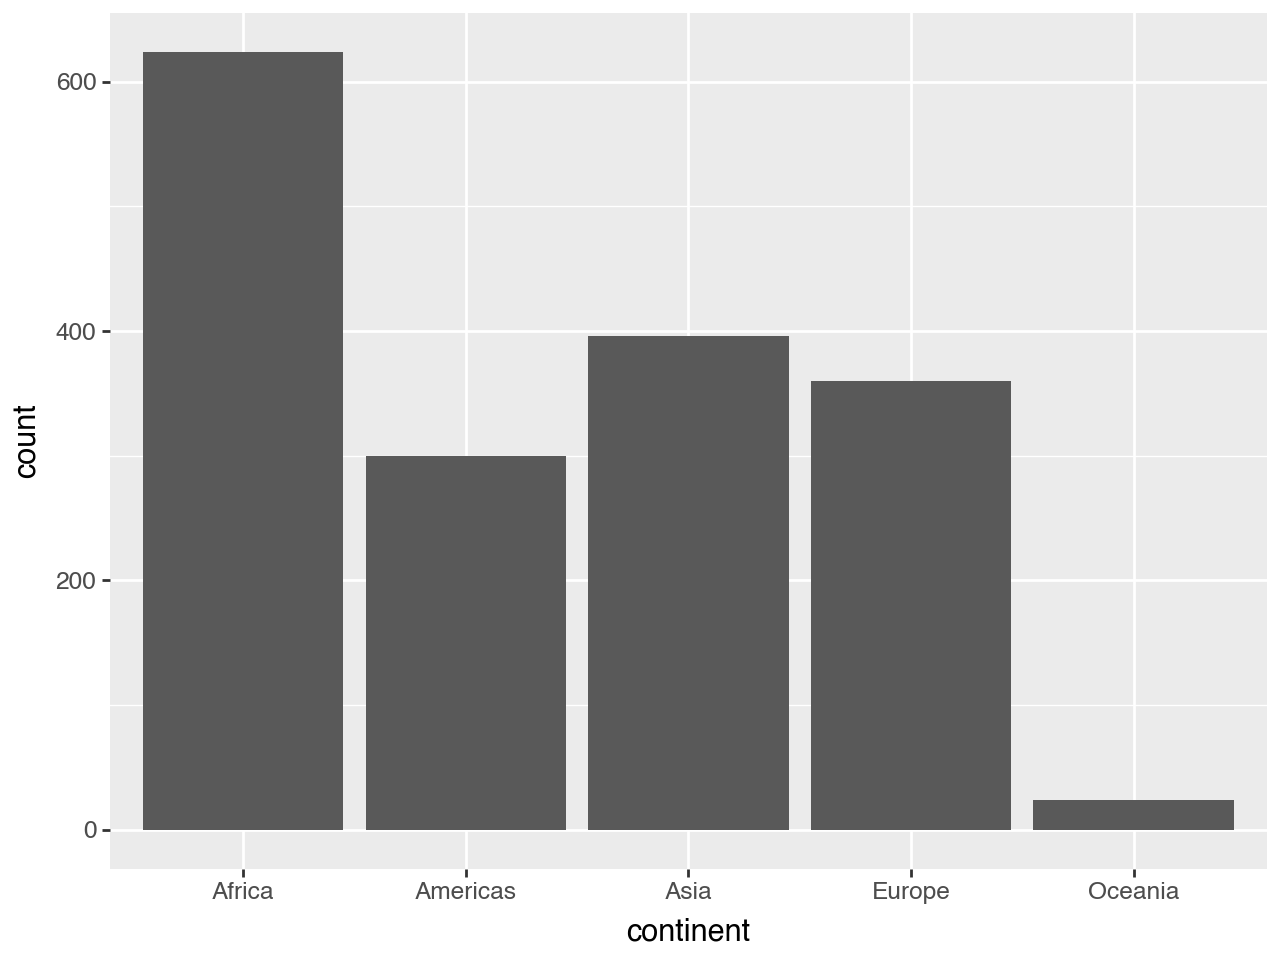

In [5]:
# Bar plot for continent
p = (ggplot(gapminder, aes(x='continent')) + geom_bar())
p.show()


To make this more colorful, you can also map the `fill` attribute to `continent`.

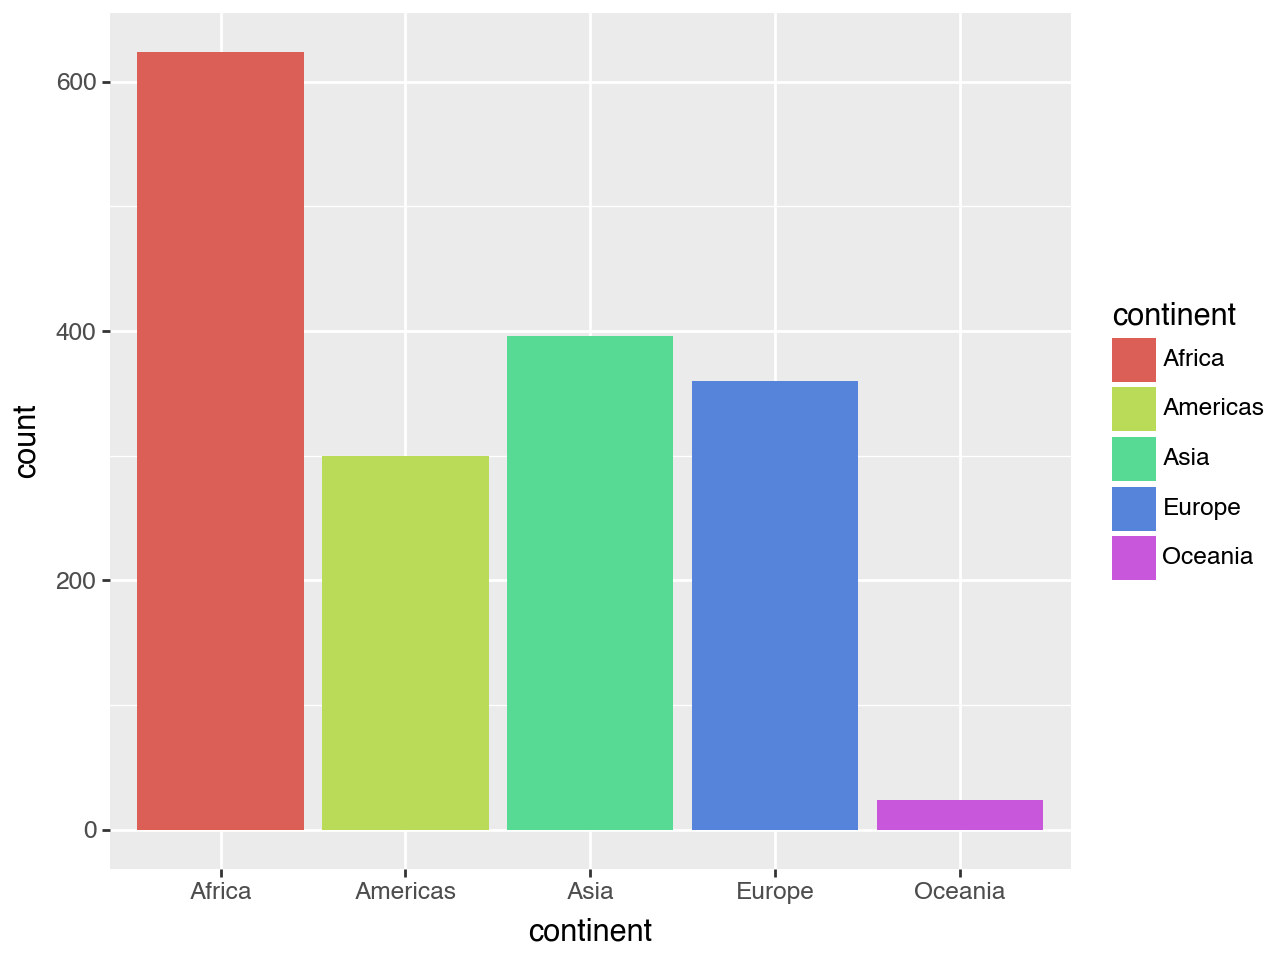

In [6]:
# Bar plot for continent with fill color
p = (ggplot(gapminder, aes(x='continent', fill='continent')) + geom_bar())
p.show()


With `plotnine` features, we will be able also to:
- change the default color schemes
- modify labels
- change the legend position, or eliminate it in some cases
- flip axis …

Let's try some!

- We will change the y axis, `count`, in `geom_bar()` to `..count../12` in order to represent the number of countries.
- Change the label of the y axis by a more meaningful one: `countries`
- Suppress the default legend for continent, which is redundant in this case


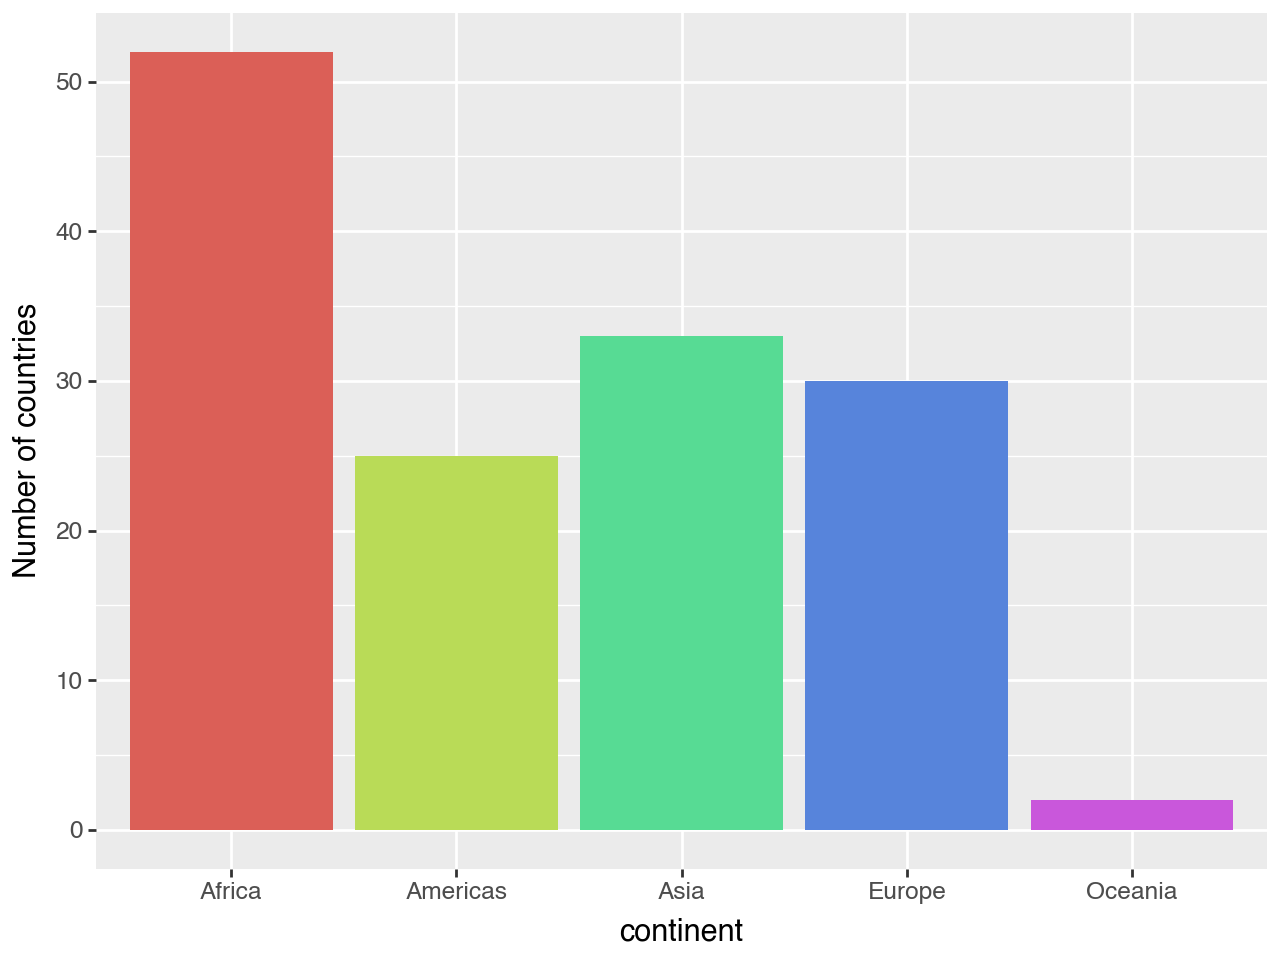

In [7]:
# Customizing the bar plot
p = (ggplot(gapminder, aes(x='continent', fill='continent')) + 
     geom_bar(aes(y='..count../12')) +
     labs(y="Number of countries") +
     guides(fill=False))
p.show()


**Note:** Ever plot in `ggplot2` is a `ggplot` object.

If you want to save a given plot for a future use, store it in a variable by using: `mybar <- ggplot() + ... `

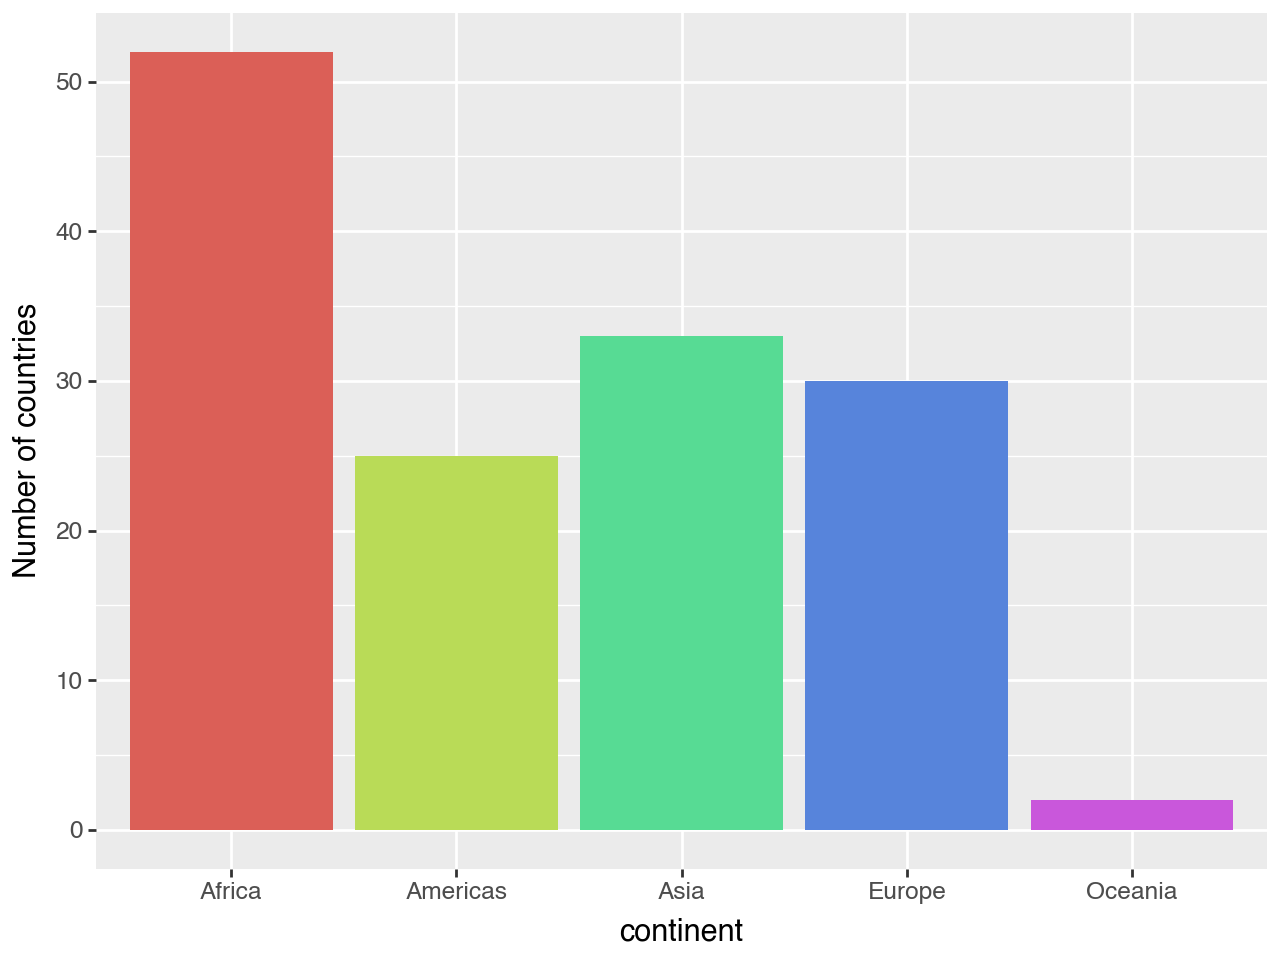

In [8]:
# Saving the plot as a variable
mybar = (ggplot(gapminder, aes(x='continent', fill='continent')) + 
         geom_bar(aes(y='..count../12')) +
         labs(y="Number of countries") +
         guides(fill=False))
mybar.show()

### Transforming Coordinates and Flipping Axes


Transforming coordinates using `coord_trans` function

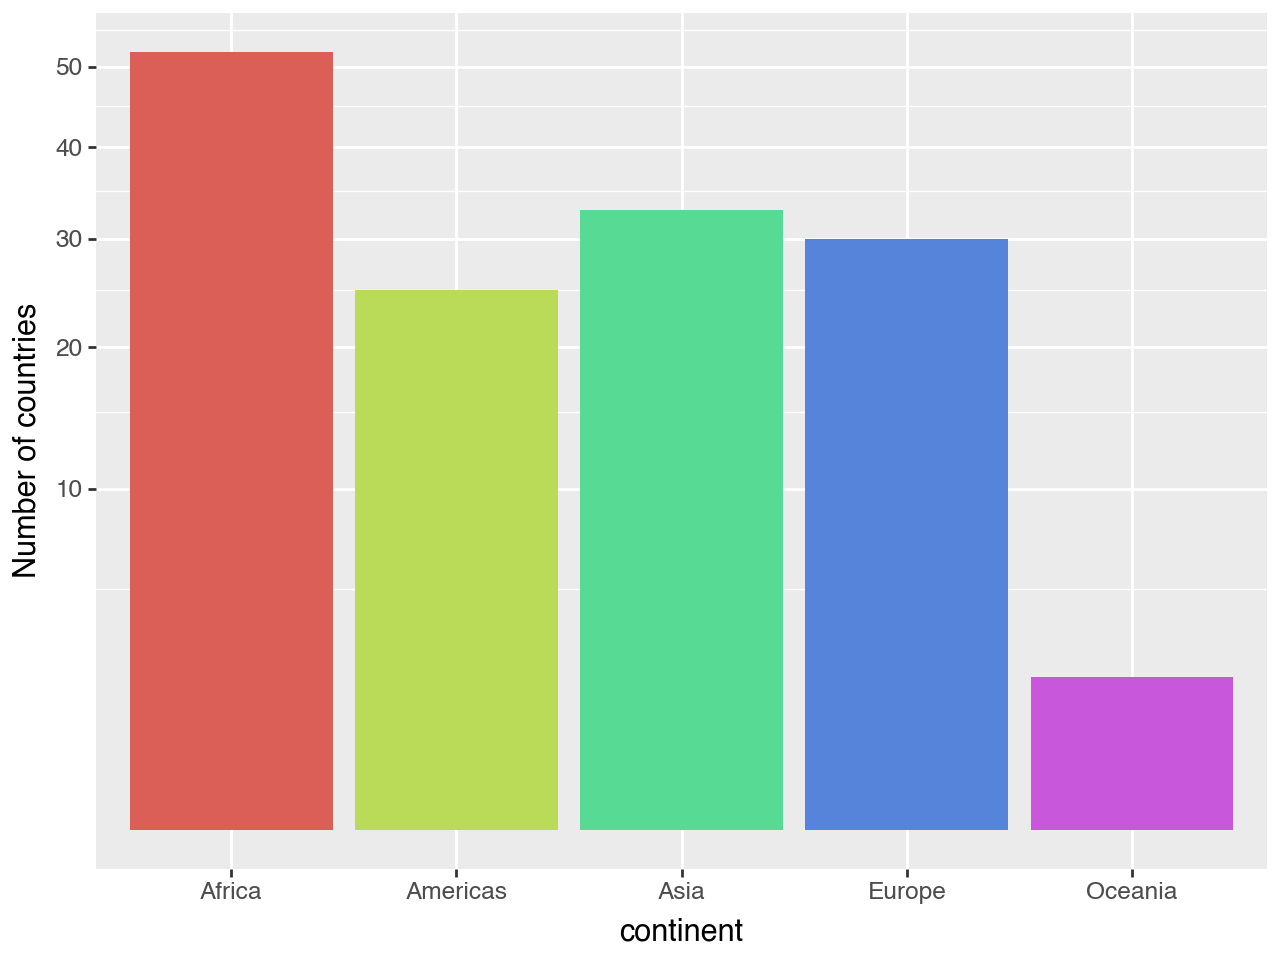

In [9]:
# Transforming coordinates using coord_trans function
mybar = (mybar + coord_trans(y="sqrt"))
mybar.show()


Flipping axes using  `coord_flip ` function

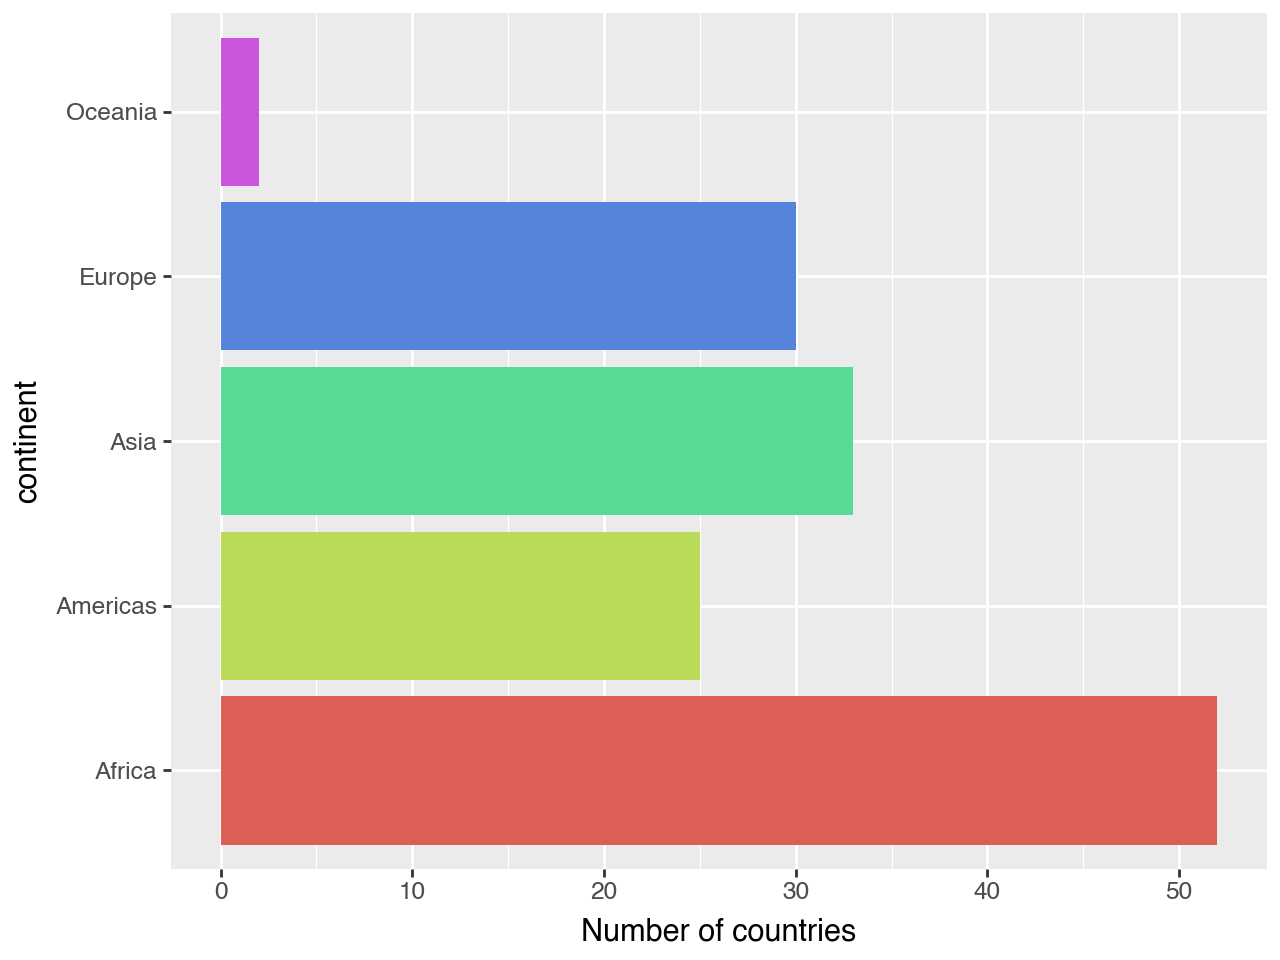

In [10]:
# Flipping axes using coord_flip function
mybar = (mybar + coord_flip())
mybar.show()

## 1D Plots: Density Plots for Continuous Variables
The `gapminder` data set contains several continuous variables: life expectancy (`lifeExp`), population (`pop`) and gross domestic product per capita (`gdpPercap`) for each year and country.
For such variables, density plots provide a useful graphical summary.
Let’s start by exploring life expectancy. The simplest plot uses this as the horizontal axis, `aes(x=lifeExp)` and then adds `geom_density()` to calculate and plot the smoothed frequency distribution.

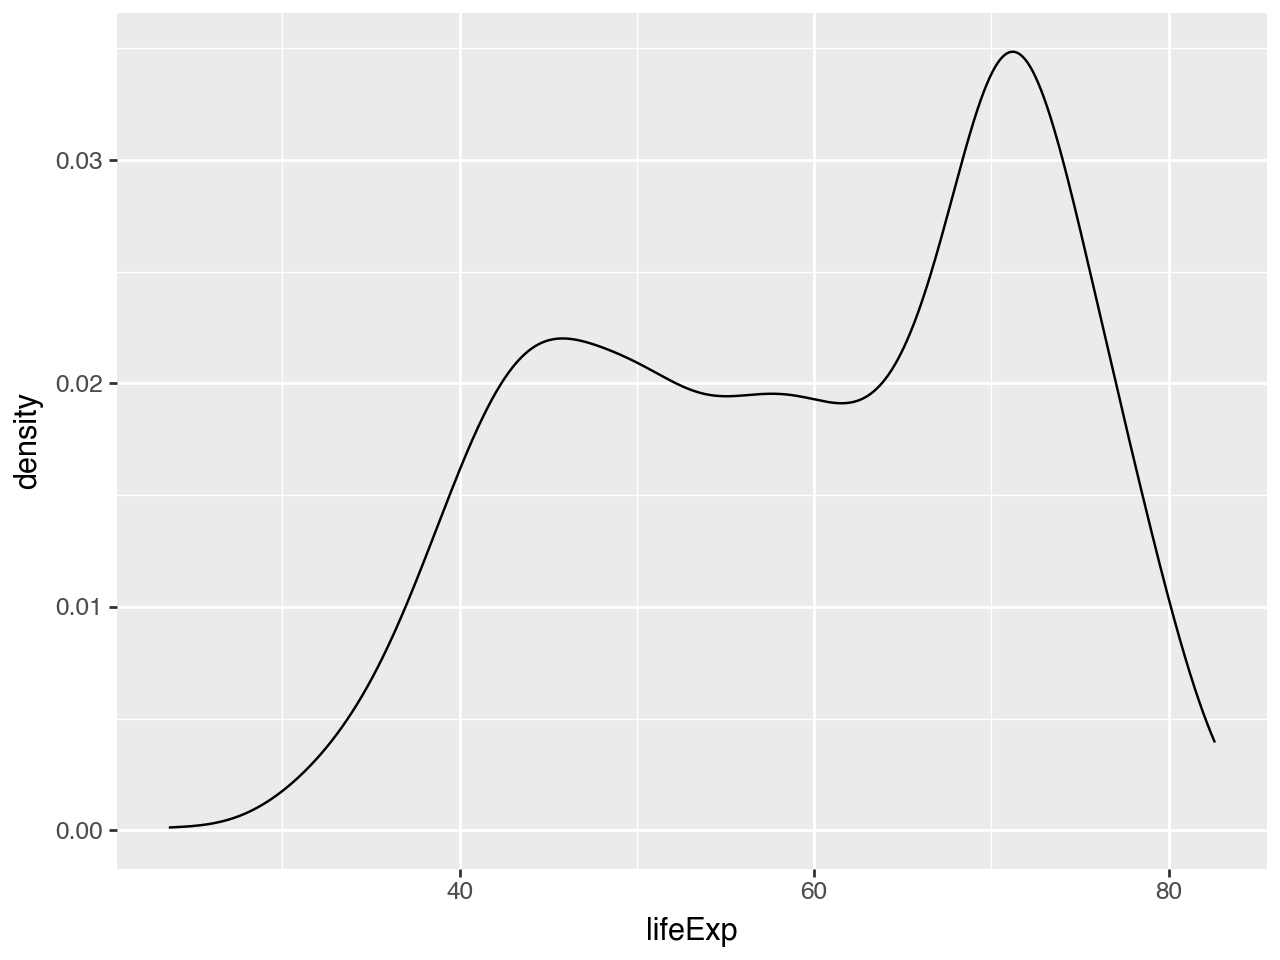

In [11]:
# Density plot for life expectancy
p = (ggplot(gapminder, aes(x='lifeExp')) + 
     geom_density())
p.show()

We have several features to make this plot prettier. Changing the line thickness (`size=`), add a fill color (`fill=""`), and make the fill color partially transparent (`alpha=`).

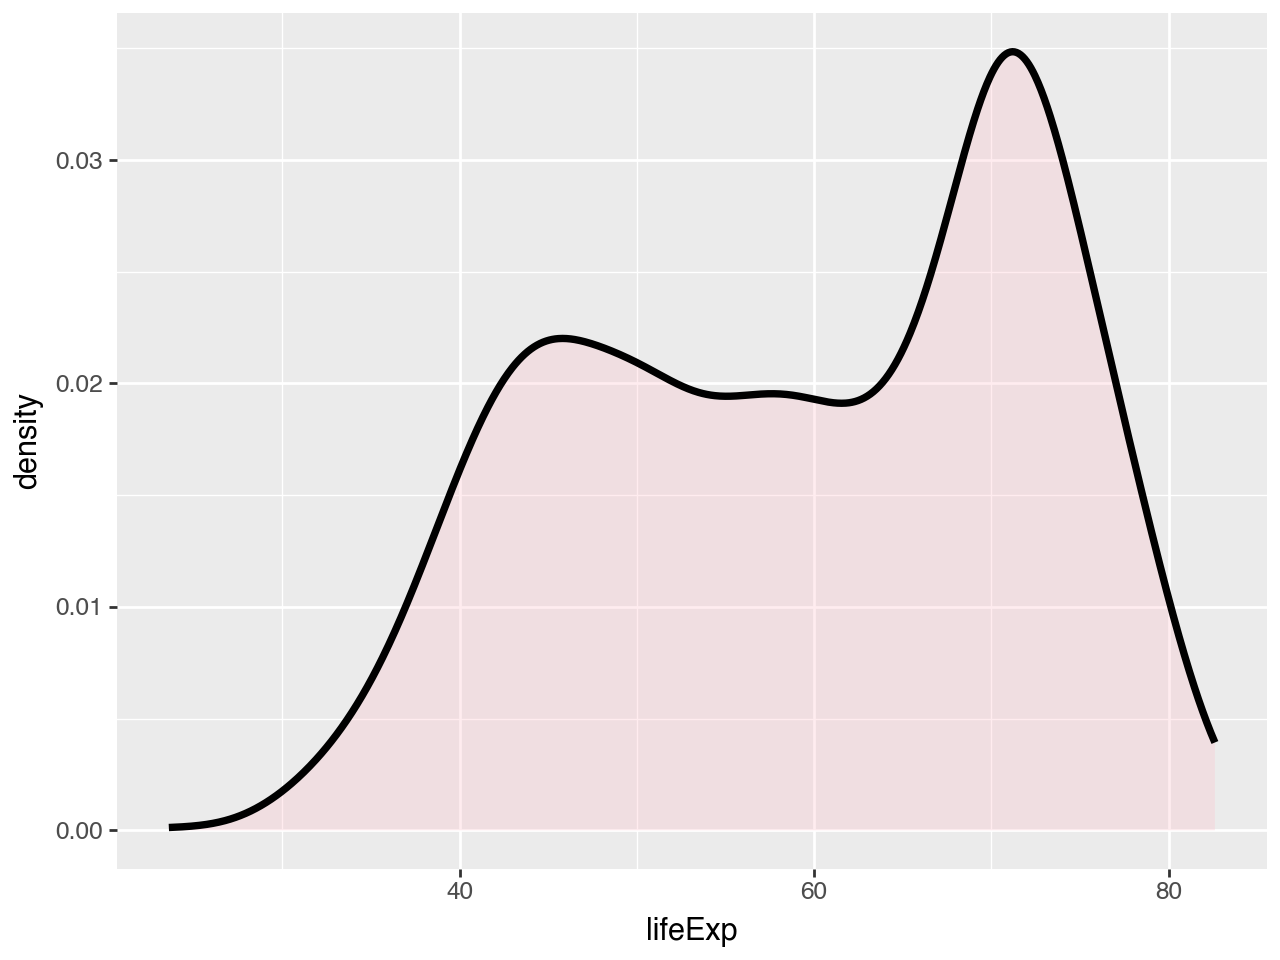

In [12]:
# Prettifying the density plot
p = (ggplot(gapminder, aes(x='lifeExp')) + 
     geom_density(size=1.5, fill="pink", alpha=0.3))
p.show()

### Differences by Continent
The plot of life expectancy is bimodal and looks not obvious. We need to add another aesthetic attribute, `fill=continent`, which is inherited in `geom_density()` to see more details about countries among continents.


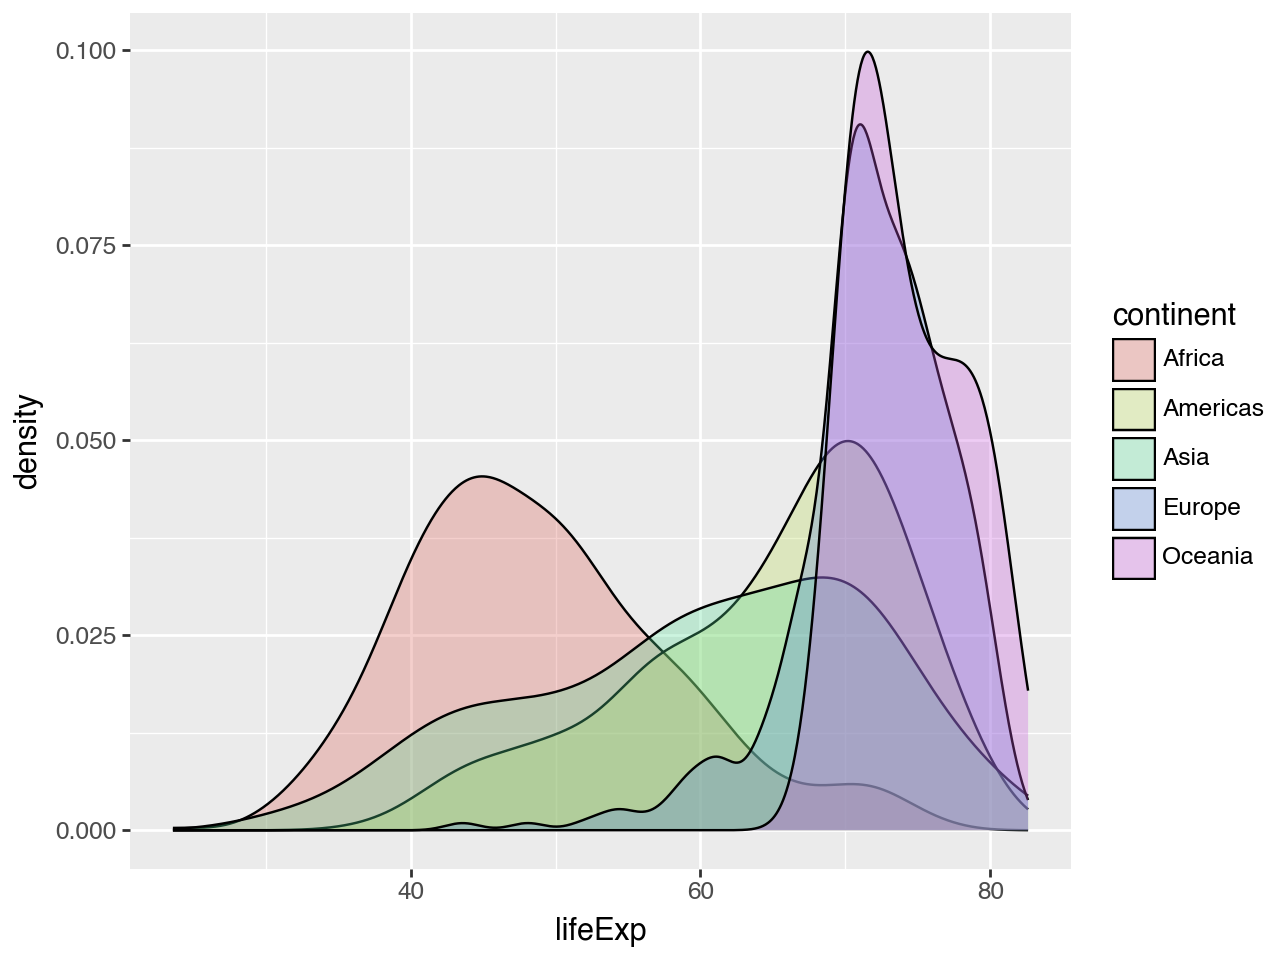

In [13]:
# Density plot for life expectancy by continent
p = (ggplot(gapminder, aes(x='lifeExp', fill='continent')) +
     geom_density(alpha=0.3))
p.show()


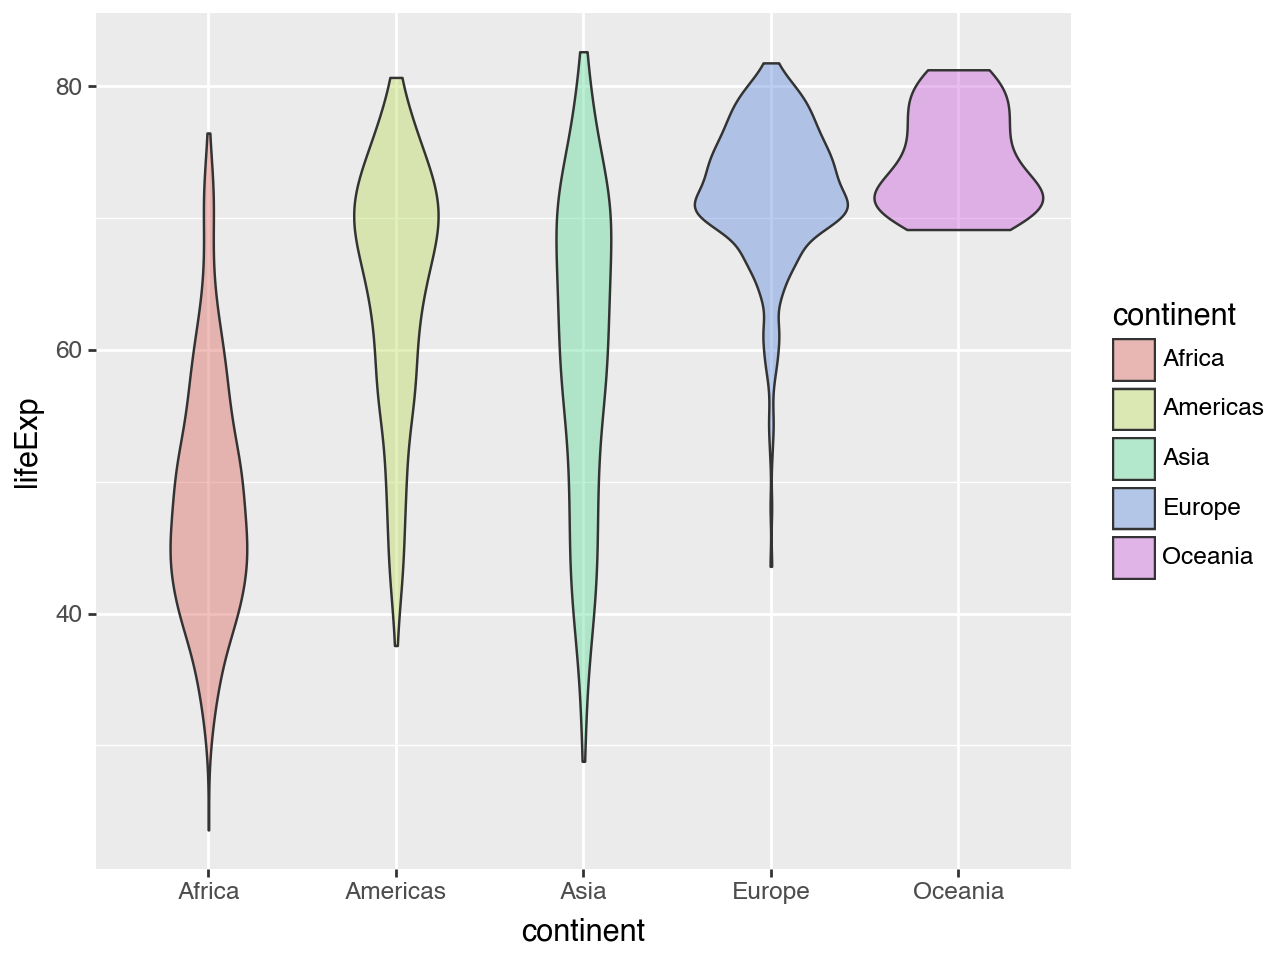

In [14]:
# Density plot for life expectancy by continent
p = (ggplot(gapminder, aes(x='continent', y='lifeExp', fill='continent')) +
     geom_violin(alpha=0.4))
p.show()

**Note 1:** We used transparent colors ( `alpha= `) to see more clearly the different distributions across continent.

**Note 2:** It is easy now to see that African countries differ markedly from the rest.

## Boxplots and Other Visual Summaries
You might want to visualize the distributions of life expectancy by another visual summary, grouped by `continent`. All you need to do is change the aesthetic to show `continent` on one axis, and life expectancy (`lifeExp`) on the other.


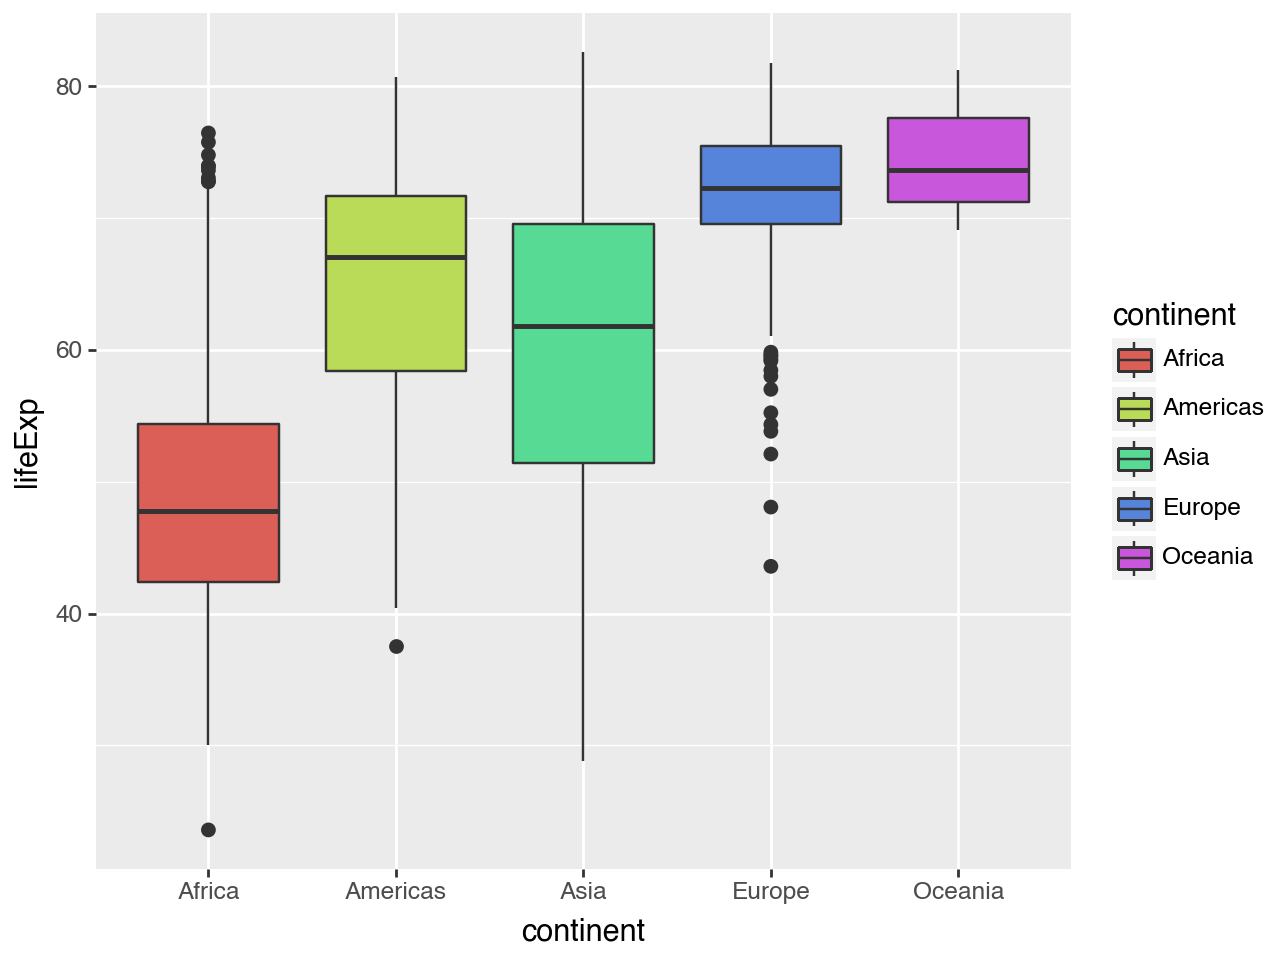

In [15]:
# Boxplot for life expectancy by continent
gap1 = ggplot(gapminder, aes(x='continent', y='lifeExp', fill='continent'))
p = gap1 + geom_boxplot(outlier_size=2) #Then, add ageom_boxplot() layer:
p.show()



 ### <span style="color:red">**Challenge 1**</span>
1. Remove the legend from this plot
2. Make the plot horizontal
3. Instead of a boxplot, try geom_violin()


## Effect Ordering
The continents are a factor and are ordered alphabetically by default. It might be more useful to order them by the mean or median life expectancy.


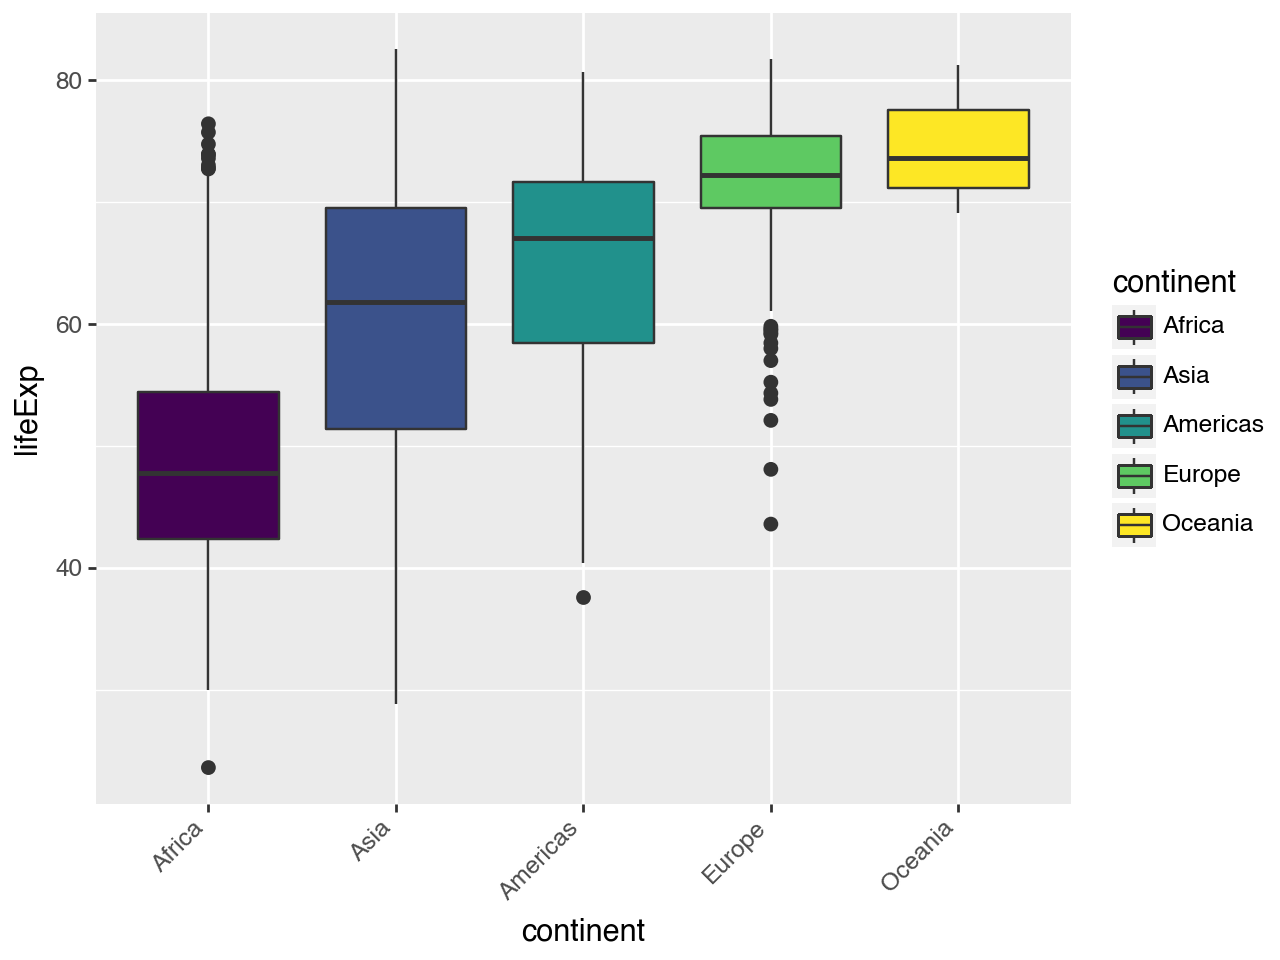

In [19]:
# Reordering continents by median life expectancy 

# Convert 'continent' to a categorical type and reorder by median life expectancy
median_life_exp = gapminder.groupby('continent', observed=False)['lifeExp'].median()
#gapminder['continent'] = pd.Categorical(gapminder['continent'], categories=median_life_exp.sort_values().index, ordered=True)
# Create a boxplot with reordered continents
p = (ggplot(gapminder, aes(x='continent', y='lifeExp', fill='continent')) +
     geom_boxplot(outlier_size=2) +
     theme(axis_text_x=element_text(rotation=45, hjust=1)))  # Rotate x-axis labels for better readability

# Show the plot
p.show()

### Exploring GDP 
Let’s look at the distribution of  `gdpPercap ` in a similar way, starting with the unconditional distribution.

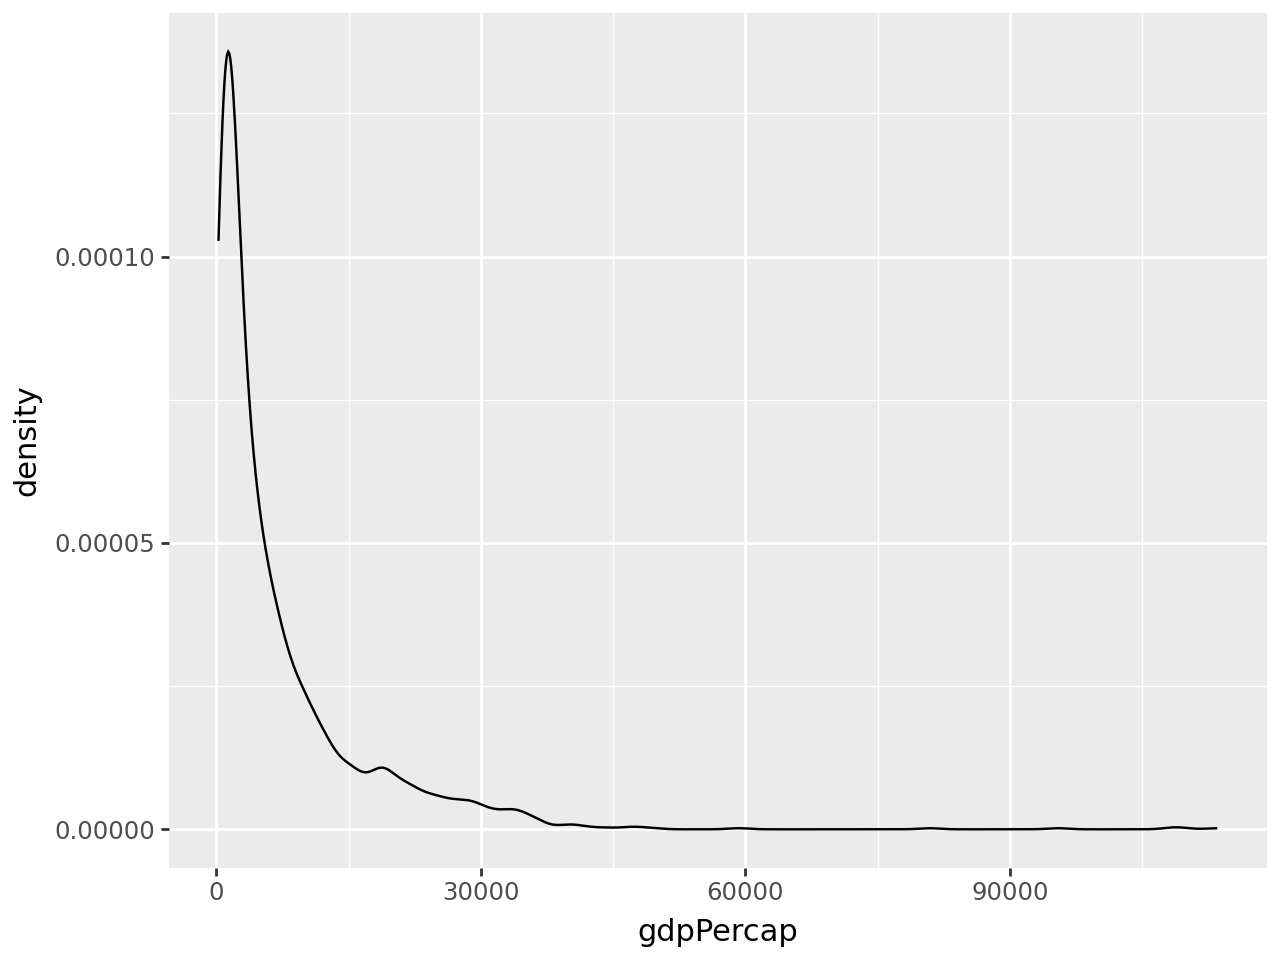

In [4]:
# Plotting the distribution of GDP per capita
p = (ggplot(gapminder, aes(x='gdpPercap')) + 
     geom_density())
# Show the plot
p.show()


### <span style="color:red">**Challenge 2**</span>

1. Plot the distributions of GDP per capita separately for each continent.
2. Transform the x-axis to a log scale and add another layer for the log transformation.
3. Create boxplots of GDP per capita by continent, with and without a log scale.


## Layers & Time series plots
### Layers
Exploring how life expectancy change with GDP per country, for expample china. We can use `geom_line` to make a line plot.

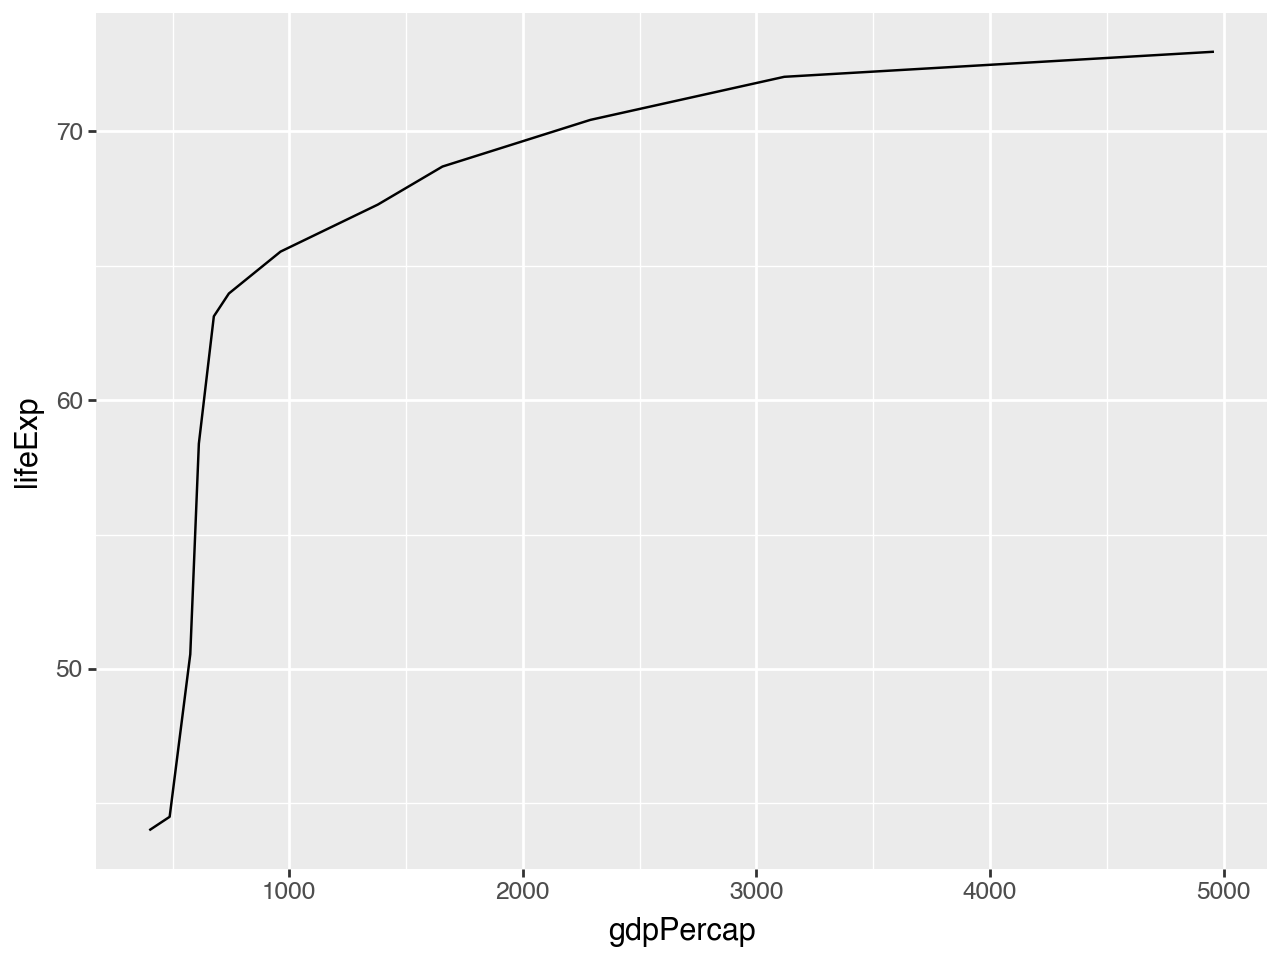

In [23]:
# Line plot for China showing life expectancy versus GDP
# Filter data for China
china = gapminder[gapminder['country'] == 'China']
china_plot = (ggplot(china, aes(x='gdpPercap', y='lifeExp'))
              + geom_line())
china_plot.show()

#### Adding Points

We can use both `geom_line` and `geom_point` to make a line plot with points at the data values.


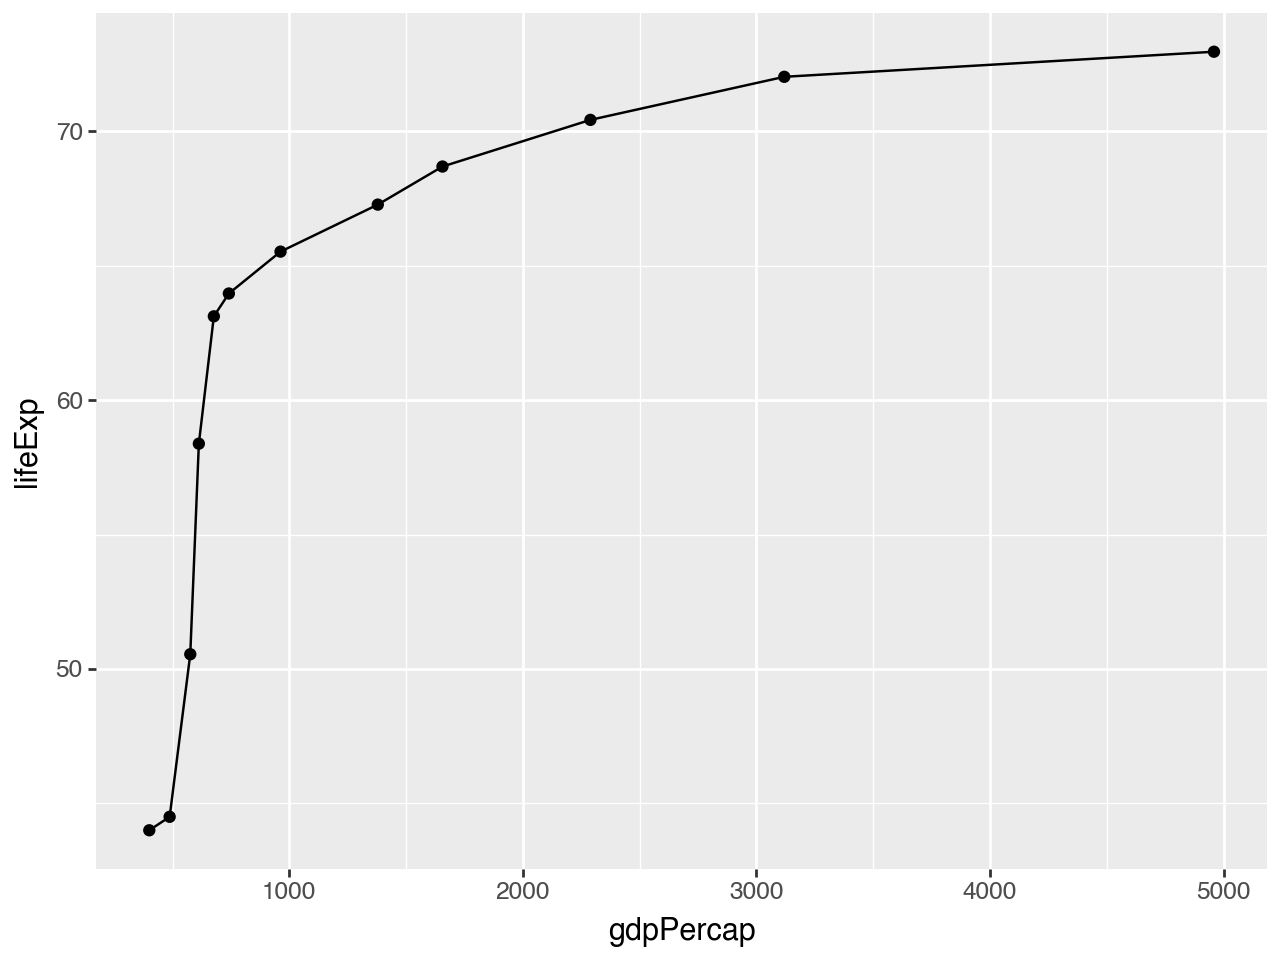

In [24]:
china_plot_with_points = (ggplot(china, aes(x='gdpPercap', y='lifeExp'))
                          + geom_line()
                          + geom_point())
china_plot_with_points.show()


**Note:** This brings up another important concept with ggplot2: layers. A given plot can have multiple layers of geometric objects, plotted one on top of the other.

#### Adding Colors

Adding colors to the lines and points to enhance visibility.


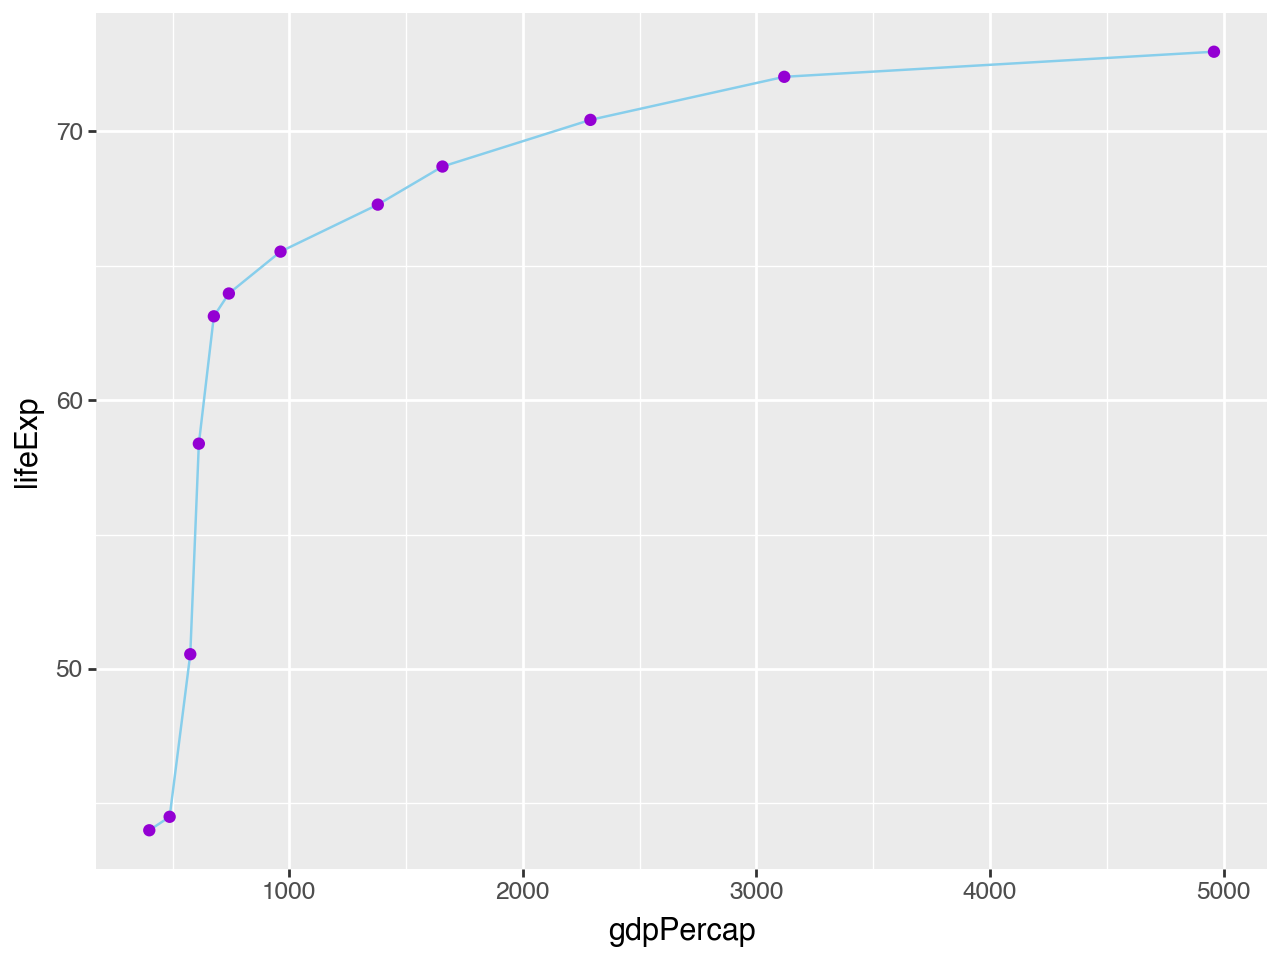

In [25]:
china_plot_colored = (ggplot(china, aes(x='gdpPercap', y='lifeExp'))
                      + geom_line(color='skyblue')
                      + geom_point(color='darkviolet'))
china_plot_colored.show()


If we switch the order of `geom_point()` and `geom_line()`, we’ll reverse the layers.

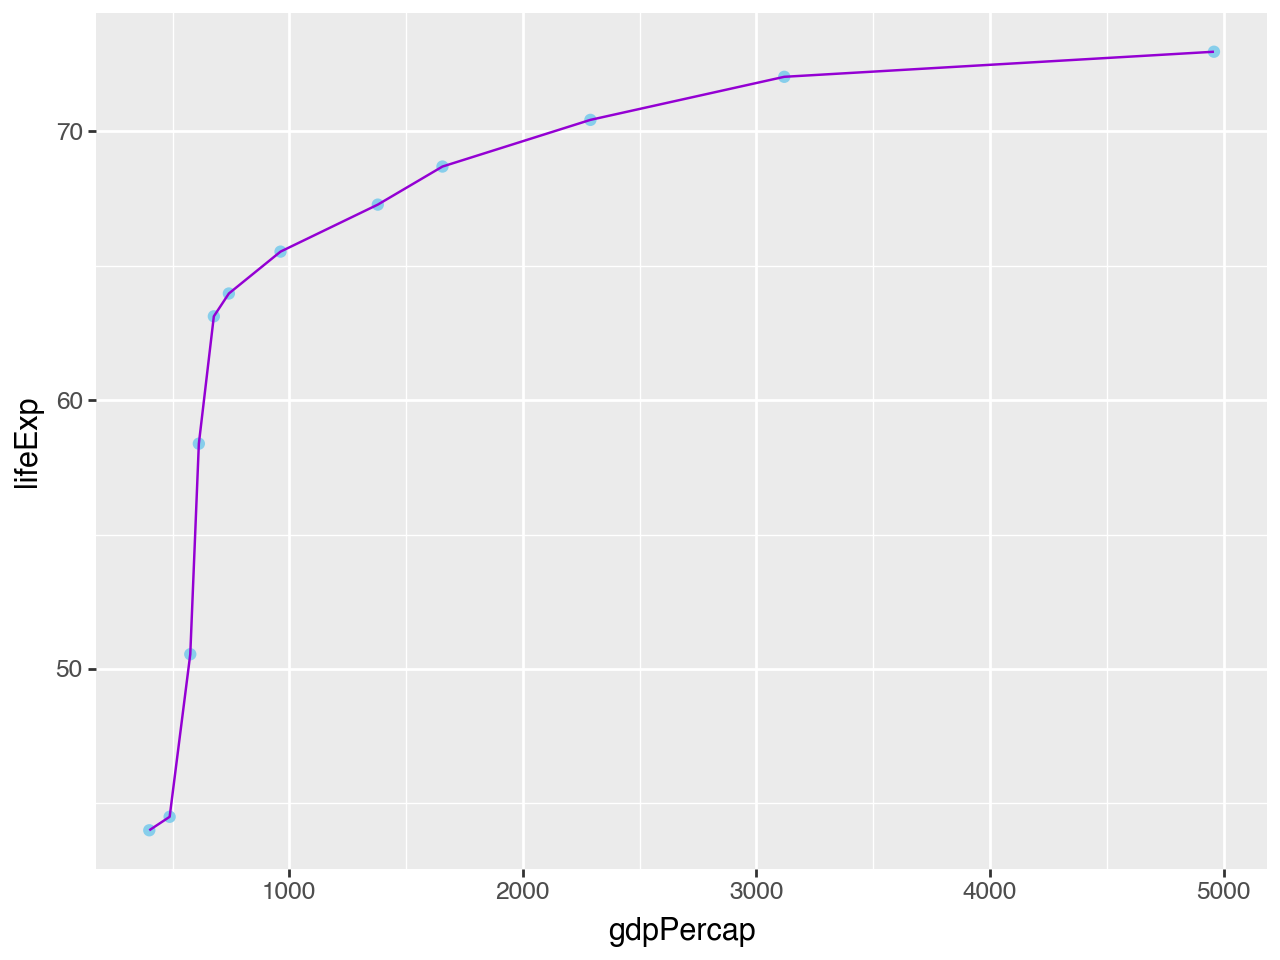

In [26]:
china_plot_colored_reversed = (ggplot(china, aes(x='gdpPercap', y='lifeExp'))
                               + geom_point(color='skyblue')
                               + geom_line(color='darkviolet'))
china_plot_colored_reversed.show()

**Note:** aesthetics that are included in the call to `ggplot2()` (or completely separately) are made to be the defaults for all layers, but we can separately control the aesthetics for each layer. For example, we could color the points by year:

#### Color Points by Year

Coloring the points by year to show additional information.


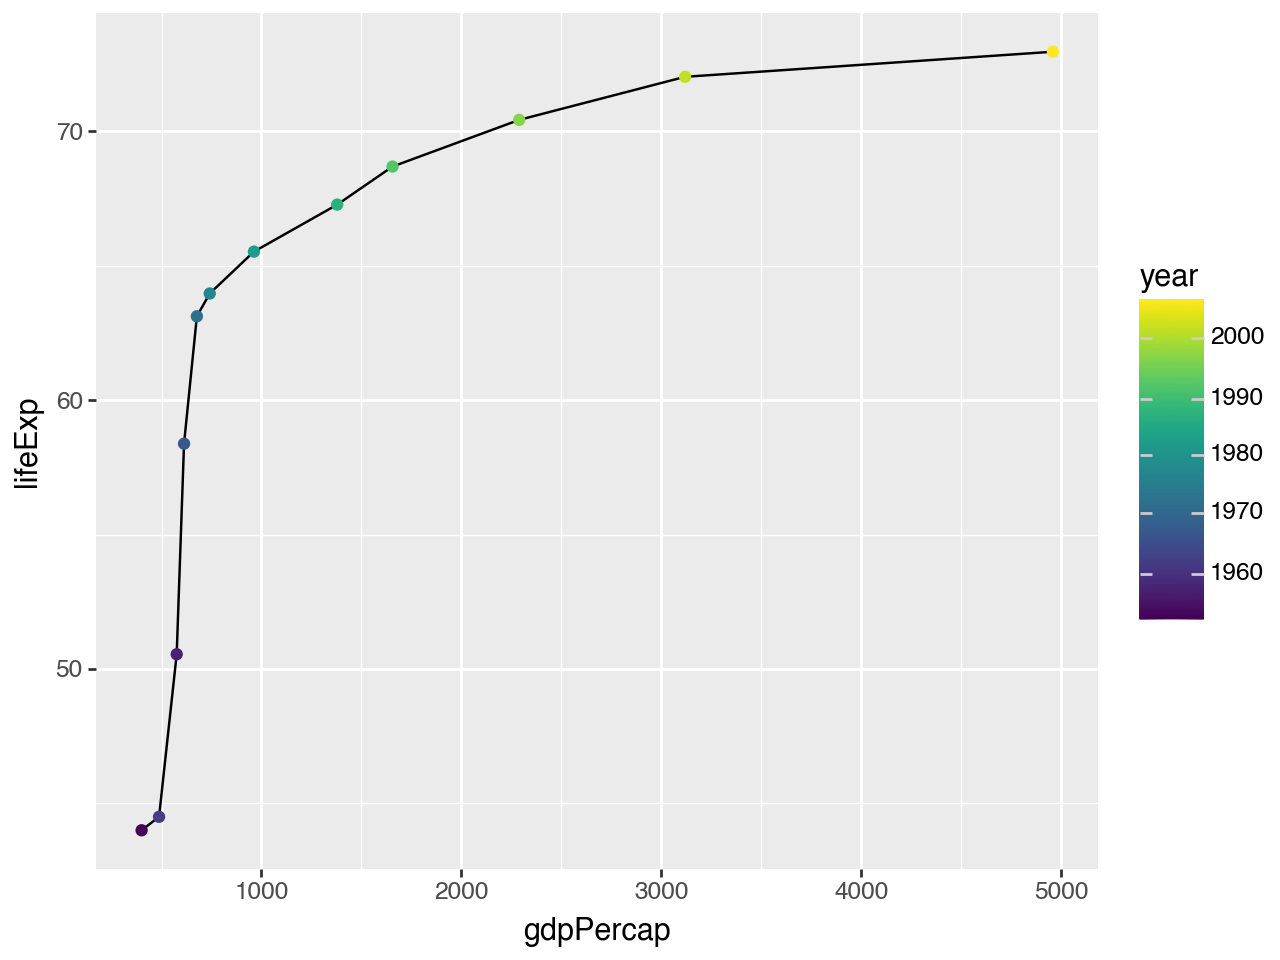

In [27]:
china_plot_colored_by_year = (ggplot(china, aes(x='gdpPercap', y='lifeExp'))
                              + geom_line()
                              + geom_point(aes(color='year')))
china_plot_colored_by_year.show()


With a rainbow:

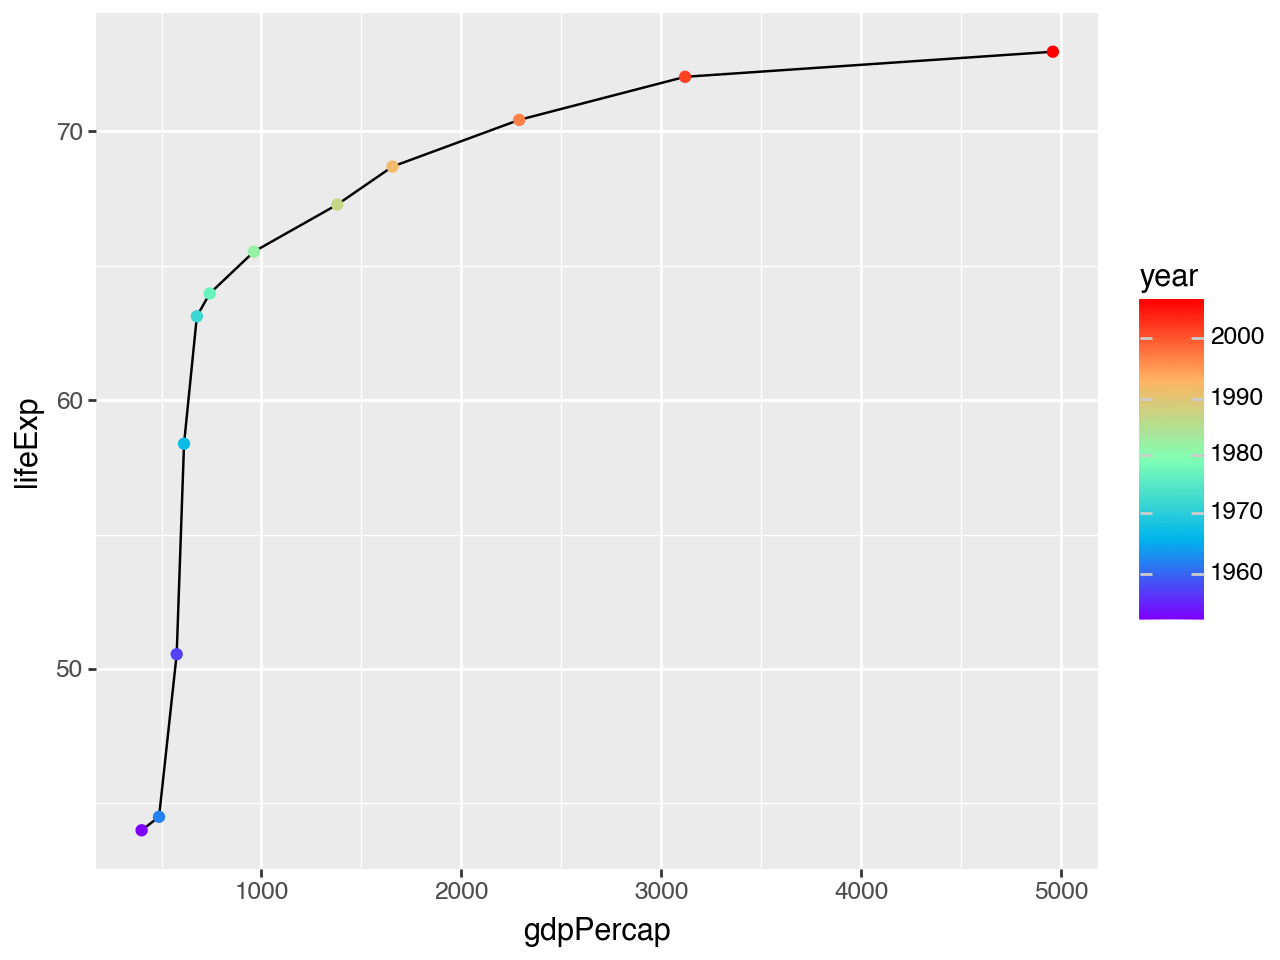

In [28]:
# With a rainbow color scale
import matplotlib.pyplot as plt
china_plot_colored_by_year_rainbow = (ggplot(china, aes(x='gdpPercap', y='lifeExp'))
                                      + geom_line()
                                      + geom_point(aes(color='year'))
                                      + scale_color_gradientn(colors=plt.cm.rainbow(np.linspace(0, 1, 5))))
china_plot_colored_by_year_rainbow.show()

Coloring both points and lines:

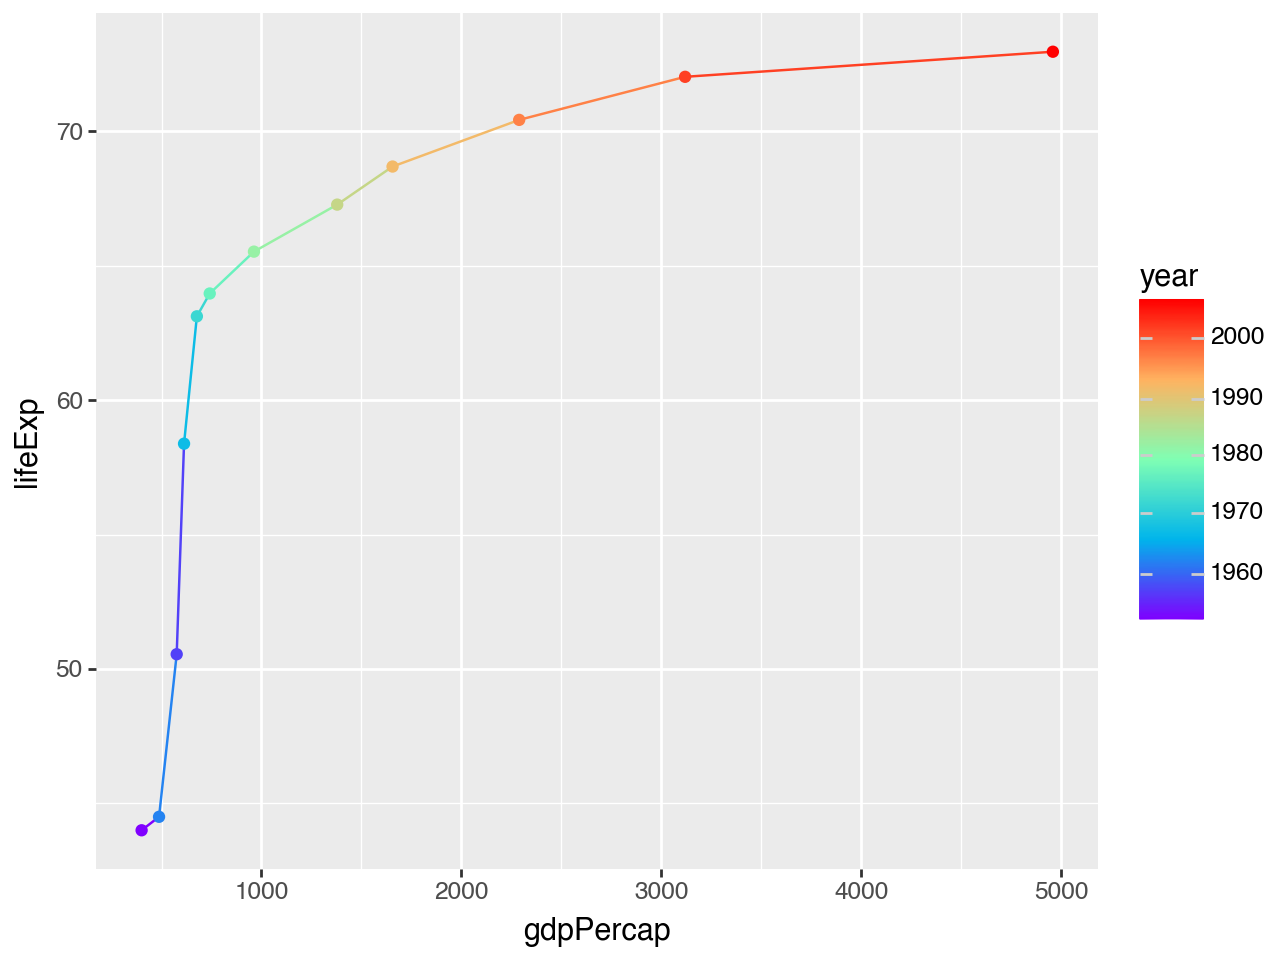

In [29]:
# With a rainbow color scale
import matplotlib.pyplot as plt
china_plot_colored_by_year_rainbow = (ggplot(china, aes(x='gdpPercap', y='lifeExp'))
                                      + geom_line()
                                      + geom_point()
                                      + scale_color_gradientn(colors=plt.cm.rainbow(np.linspace(0, 1, 5)))
                                      + aes(color='year'))

china_plot_colored_by_year_rainbow.show()

### <span style="color:red">**Challenge 3**</span>

Make a plot of life expectancy vs. GDP per capita for China and India, with both lines and points.


## Time Series Plot

Exploring how life expectancy has changed over time. We use the `group` aesthetic to create a line for each country.


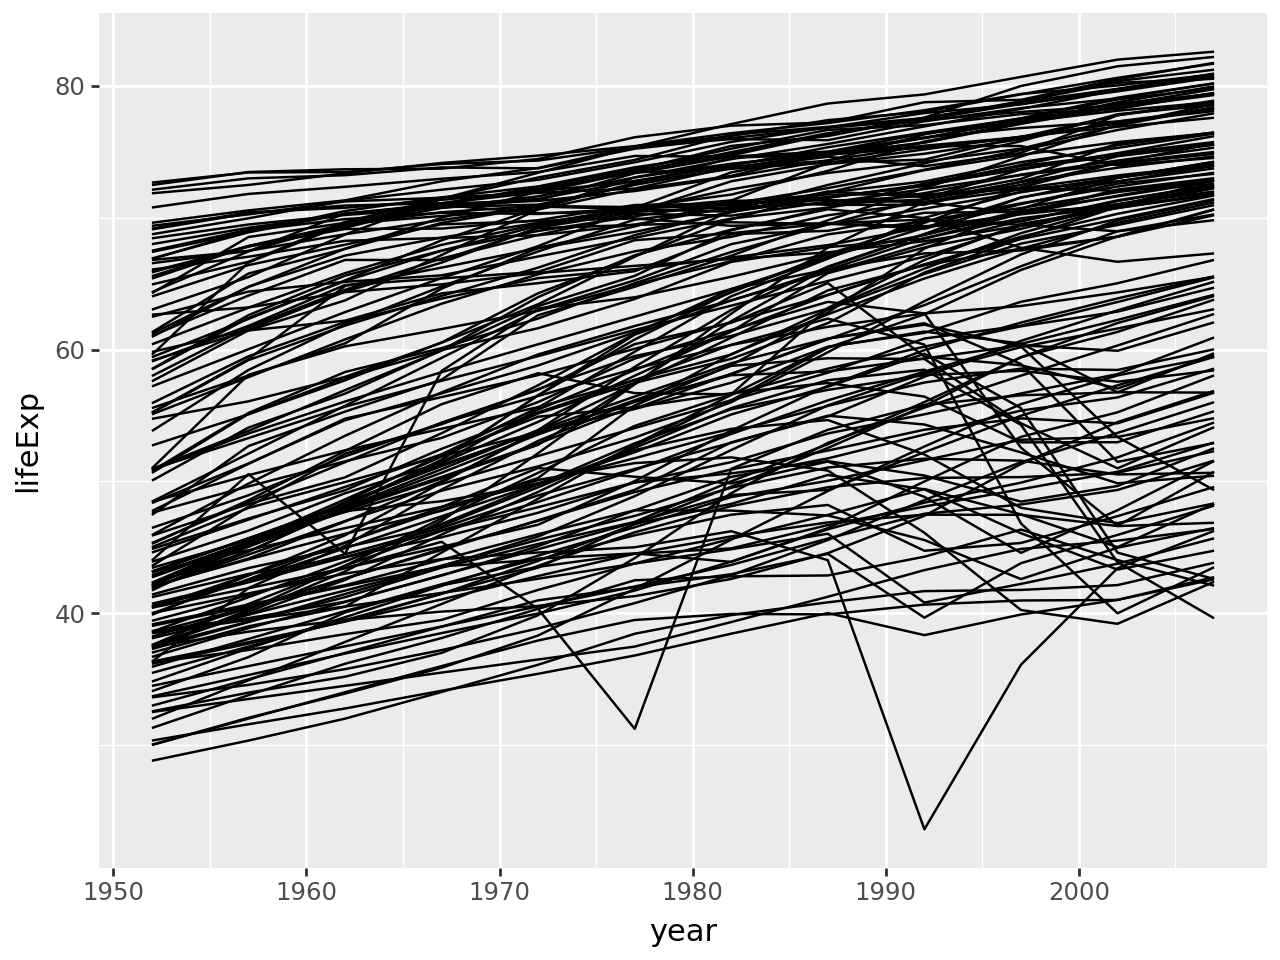

In [19]:
time_series_plot = (ggplot(gapminder, aes(x='year', y='lifeExp', group='country'))
                    + geom_line())
time_series_plot.show()


#### Adding Colors

Adding color to the lines based on continent.


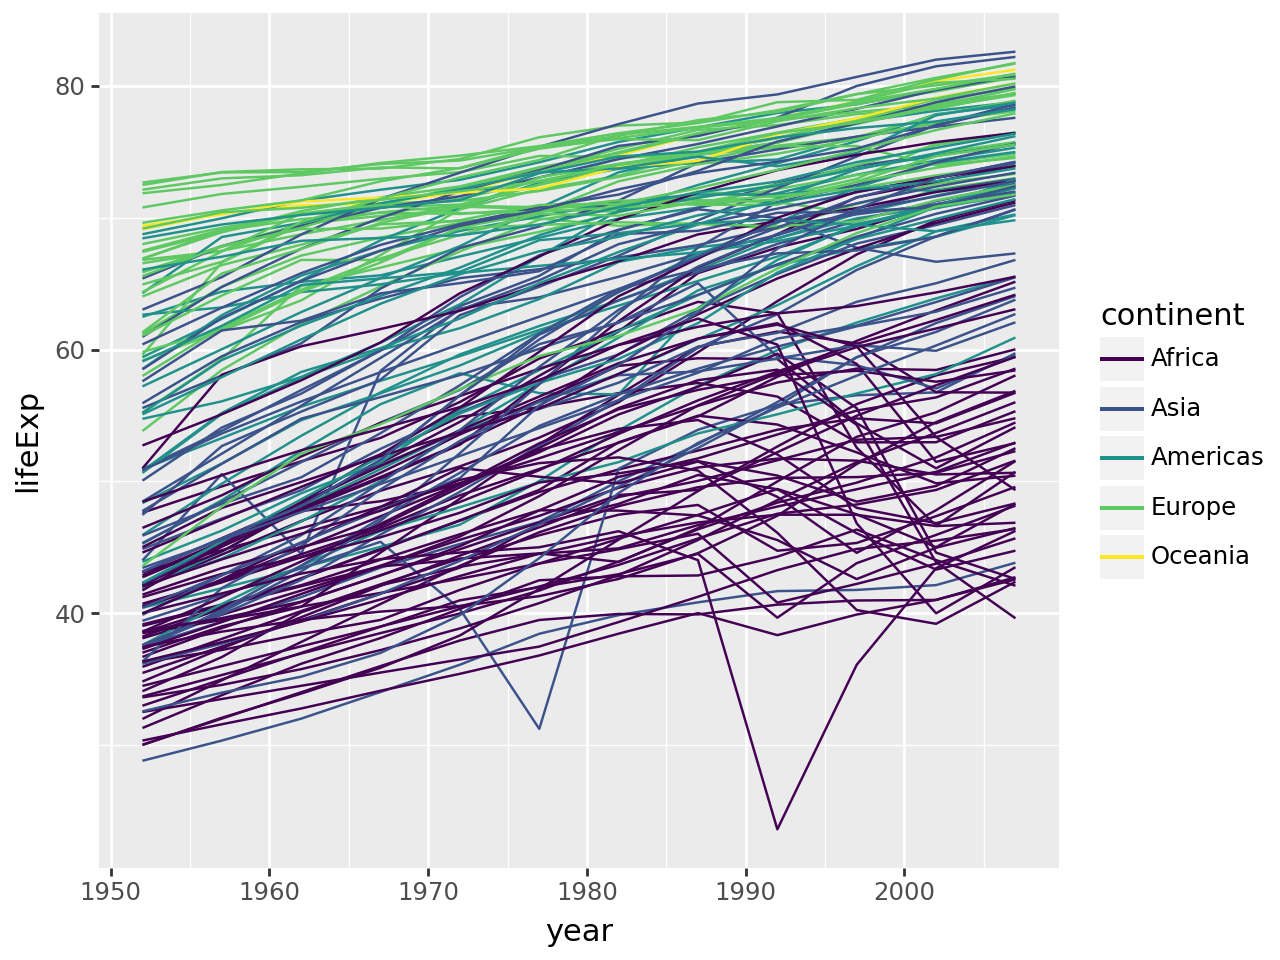

In [3]:
time_series_plot_colored = (ggplot(gapminder, aes(x='year', y='lifeExp', group='country', color='continent'))
                            + geom_line())
time_series_plot_colored.show()


#### Changing Color Shade

Changing the color shade to make the plot more readable.


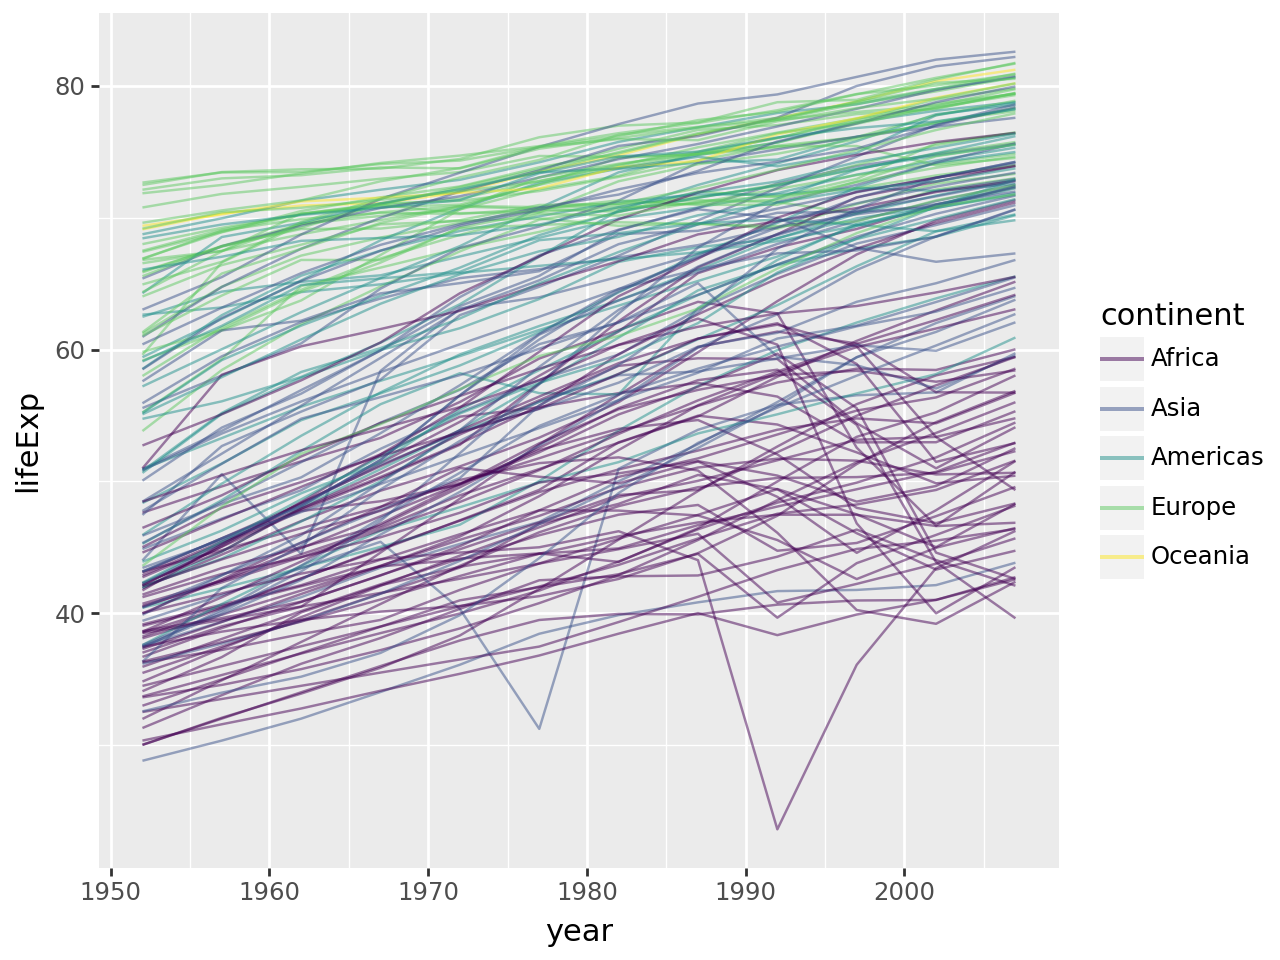

In [21]:
time_series_plot_alpha = (ggplot(gapminder, aes(x='year', y='lifeExp', group='country', color='continent'))
                          + geom_line(alpha=0.5))
time_series_plot_alpha.show()


### Plotting a Summary

A better look at trends over time is to find the mean or median for each `year` and `continent` and plot those.


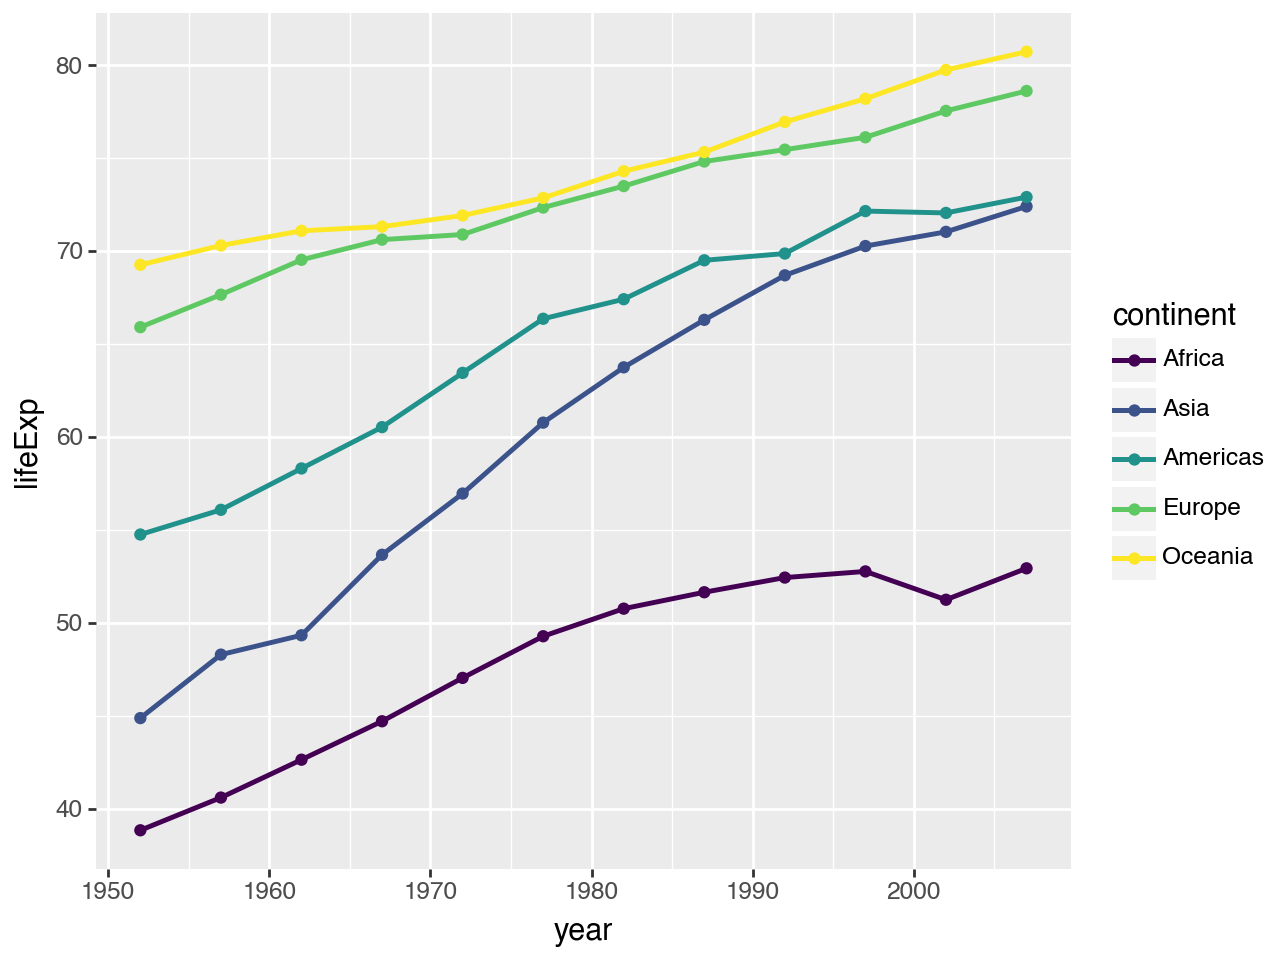

In [32]:
summary = (gapminder.groupby(['continent', 'year'],observed=False)
           .agg({'lifeExp': 'median'})
           .reset_index())

summary_plot = (ggplot(summary, aes(x='year', y='lifeExp', color='continent'))
                + geom_line(size=1)
                + geom_point(size=1.5))
summary_plot.show()


Let’s play with our plot and make it more fancy! 

We can fit linear regression lines for each `continent` instead of joining all the points:

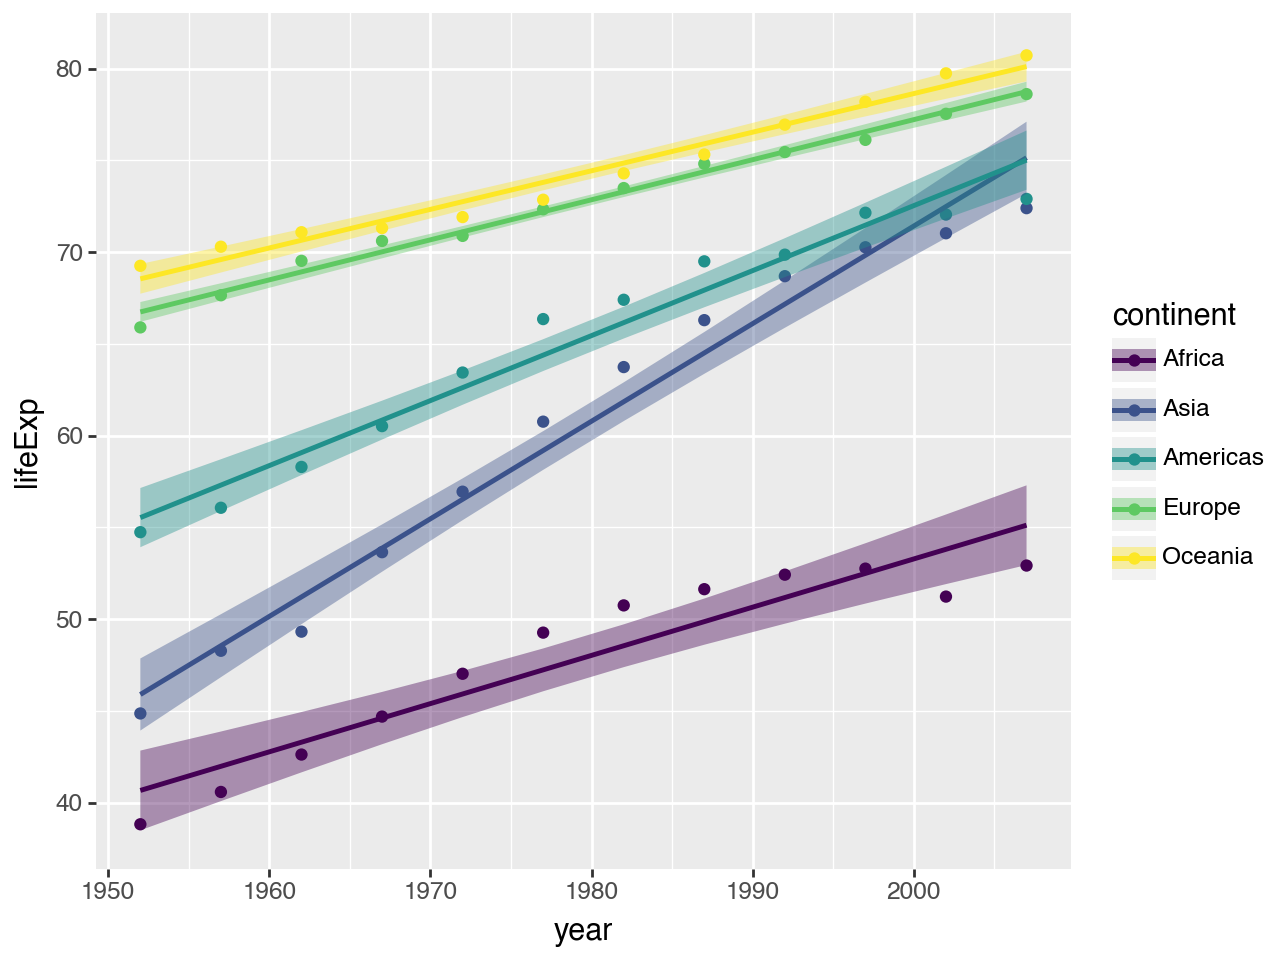

In [34]:
# Linear regression
regression_plot = (ggplot(summary, aes(x='year', y='lifeExp', color='continent'))
                    + geom_point(size=1.5)
                    + geom_smooth(aes(fill='continent'), method='lm'))
regression_plot.show()


We can also use a `loess` smooth rather than a linear regression:

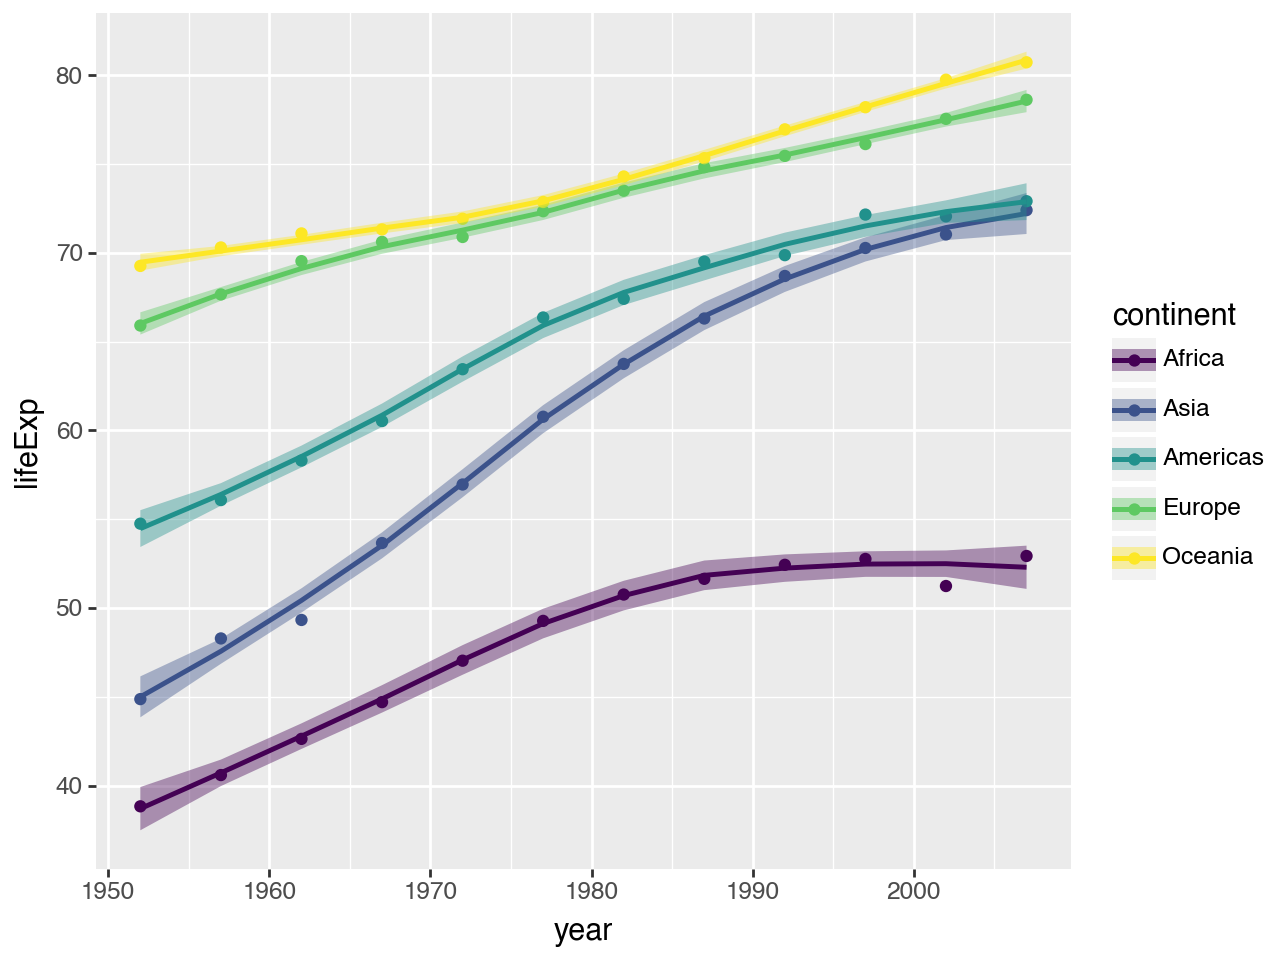

In [39]:
# Loess smooth
#!pip install scikit-misc
loess_plot = (ggplot(summary, aes(x='year', y='lifeExp', color='continent'))
              + geom_point(size=1.5)
              + geom_smooth(aes(fill='continent'), method='loess'))
loess_plot.show()


We can change the default use of legends by placing it inside the plot:

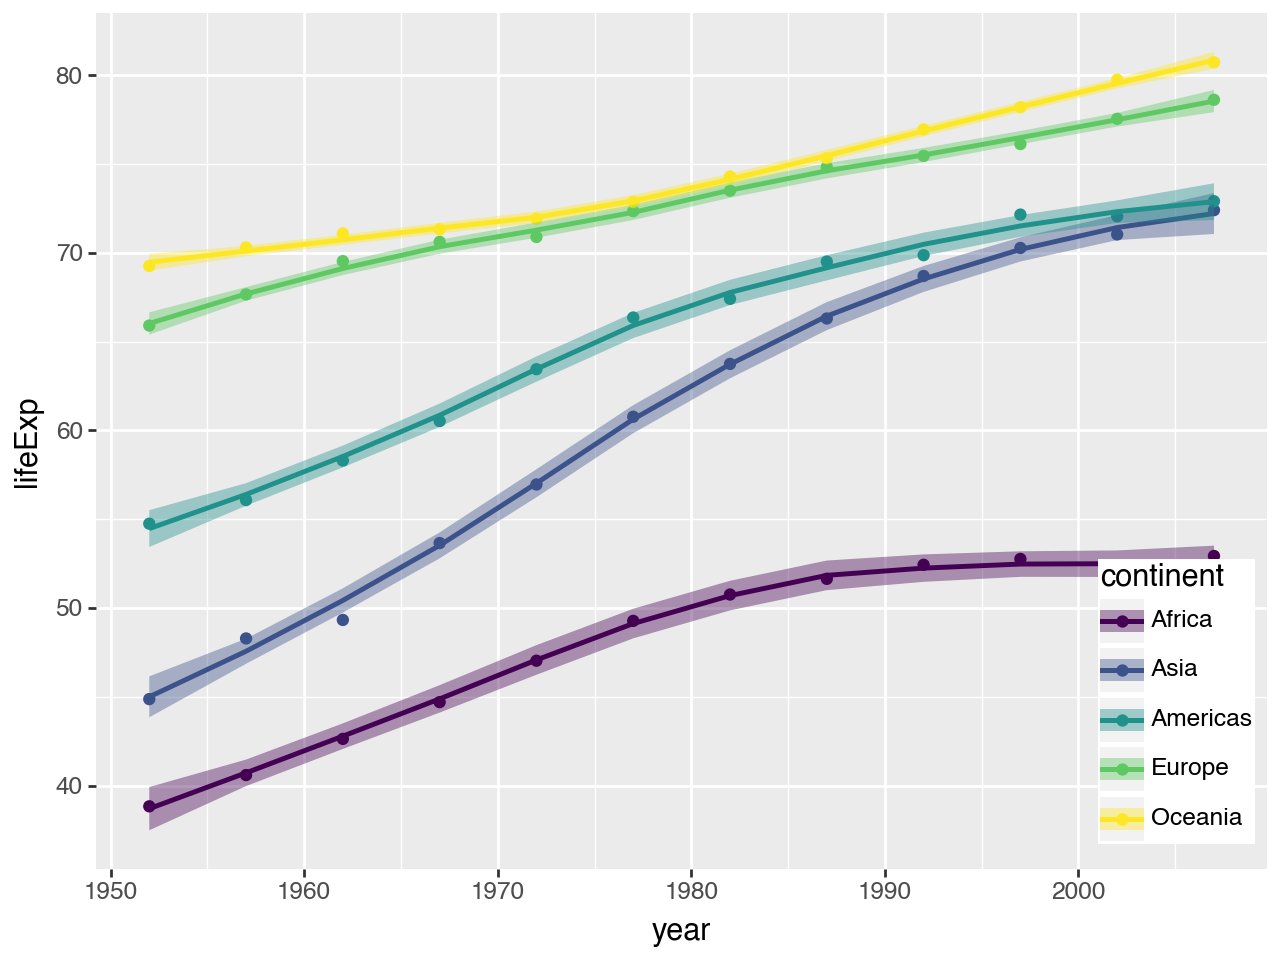

In [40]:
# Changing legend position
legend_plot = (ggplot(summary, aes(x='year', y='lifeExp', color='continent'))
               + geom_point(size=1.5)
               + geom_smooth(aes(fill='continent'), method='loess')
               + theme(legend_position=(0.99, 0.03), legend_justification=("right", "bottom")))
legend_plot.show()

## Scatterplots

Let’s explore the relationship between life expectancy and GDP with scatterplots.

A basic scatterplot is set up by assigning two variables to the `x` and `y` aesthetic attributes then we can add the points in another layer.


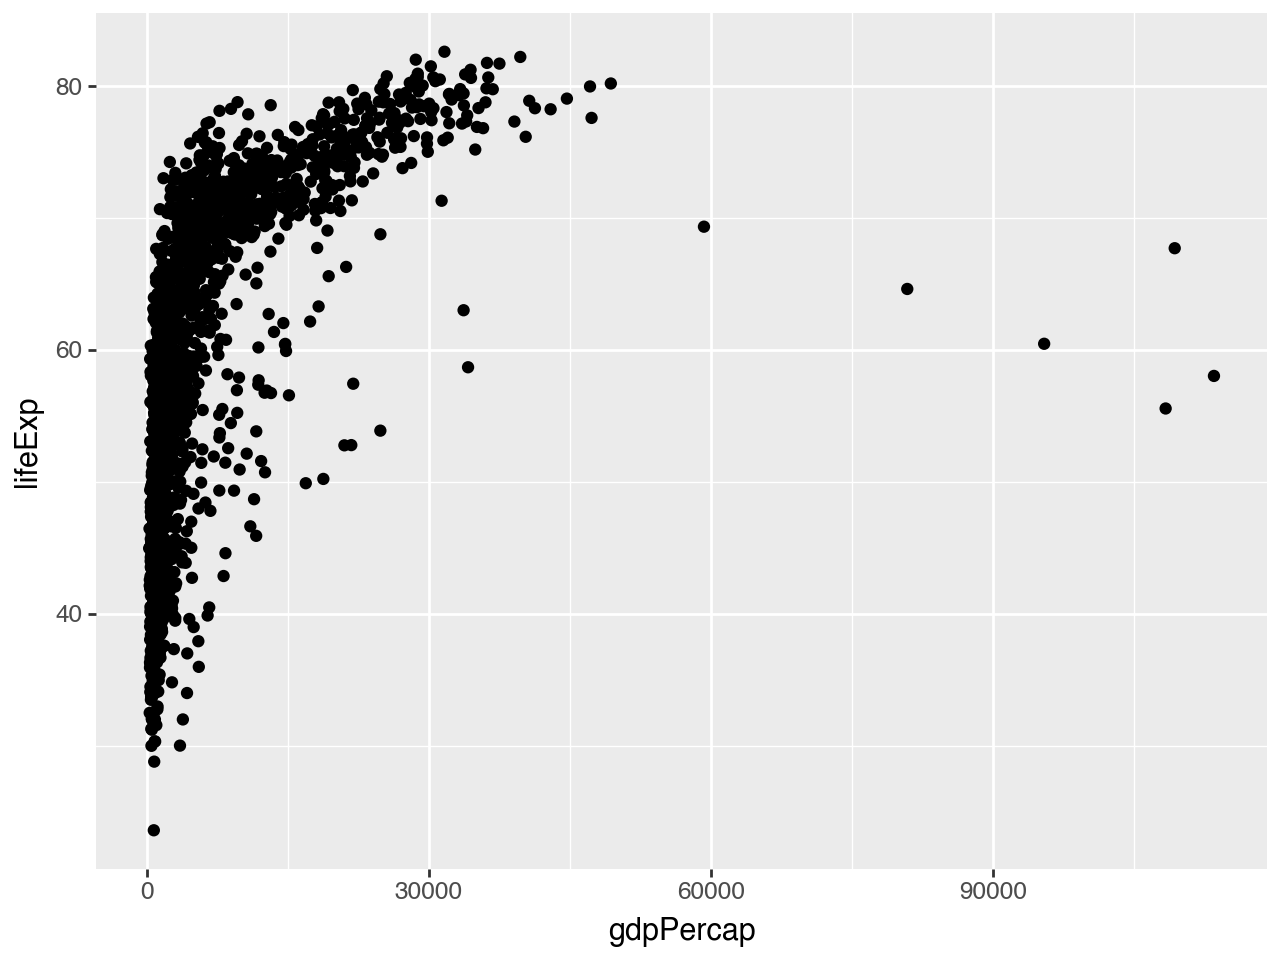

In [41]:
scatter_plot = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
                + geom_point())
scatter_plot.show()

Or, color them by continent.

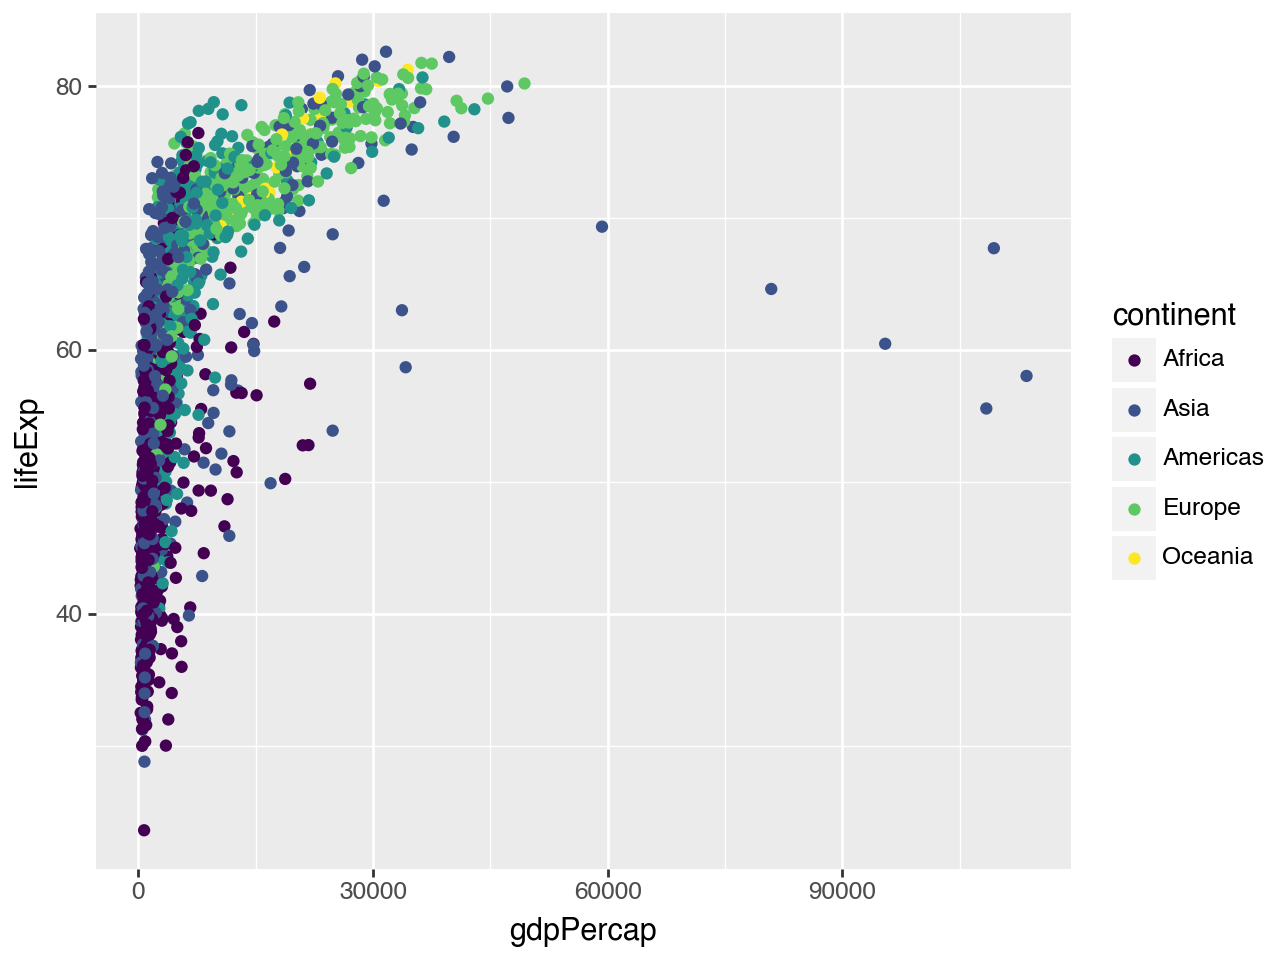

In [43]:
# Color by continent
scatter_plot_colored = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', color='continent'))
                        + geom_point())
scatter_plot_colored.show()

For a better look, we can also add a smoothed curve for all the data:

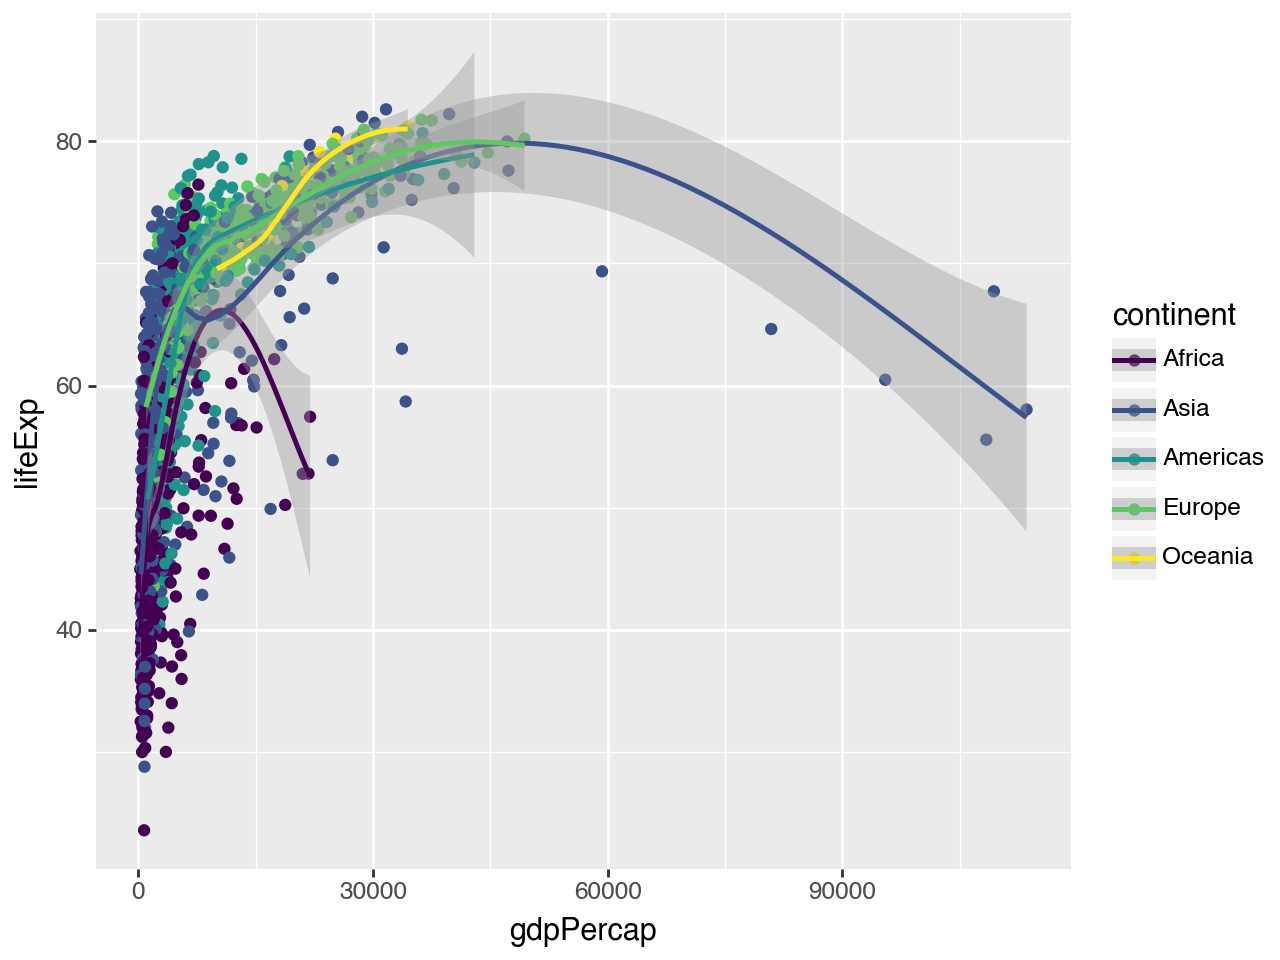

In [44]:
# Add smoothed curve
# for each continent
scatter_plot_smoothed = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', color='continent'))
                         + geom_point()
                         + geom_smooth(method='loess'))
scatter_plot_smoothed.show()



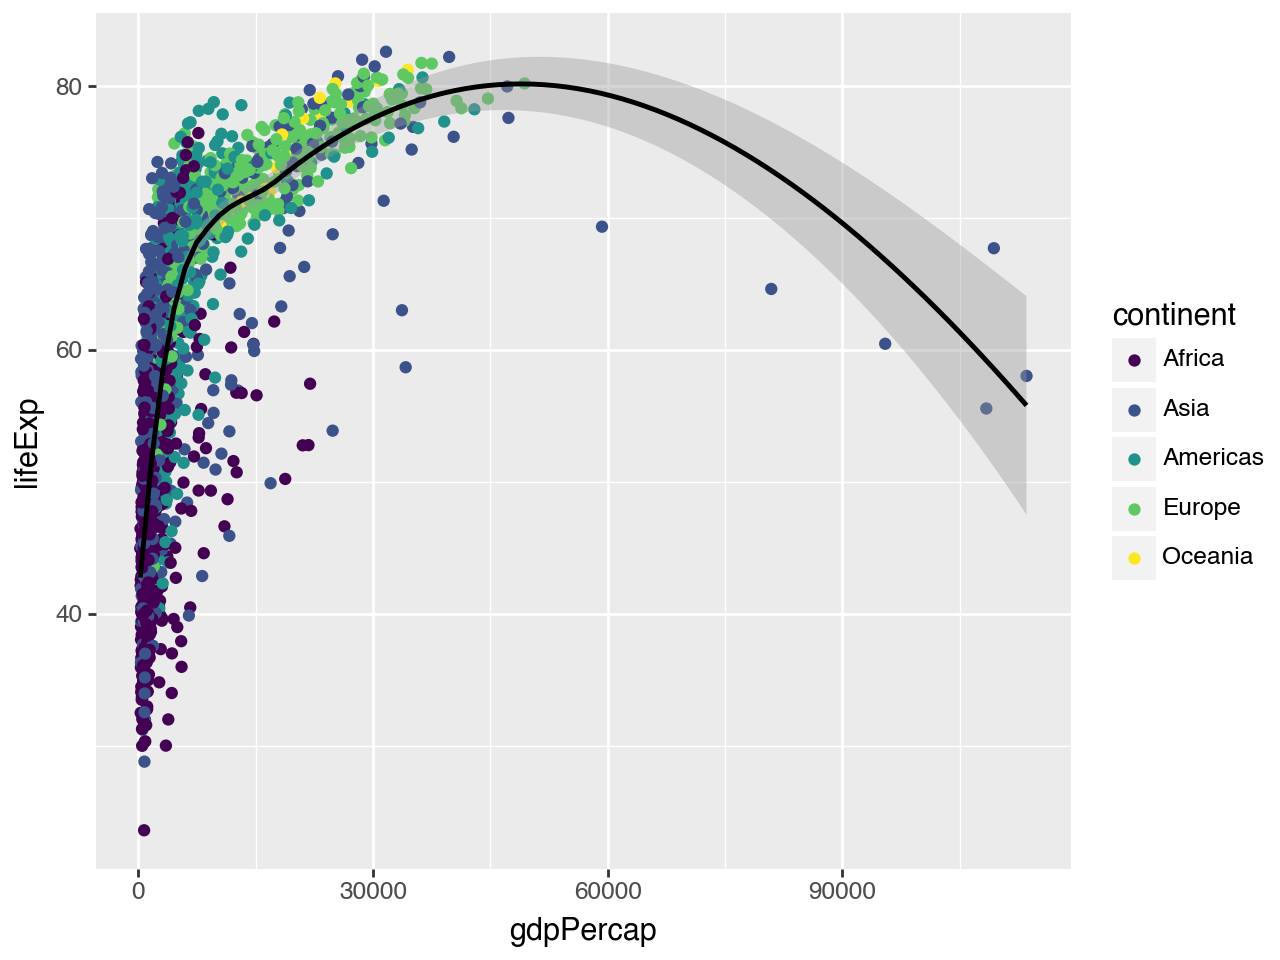

In [45]:
# for all continent
scatter_plot_smoothed = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
                         + geom_point(aes(color='continent'))
                         + geom_smooth(method='loess'))
scatter_plot_smoothed.show()

As we have seen earlier about GDP, this variable is better plotted on a log scale:

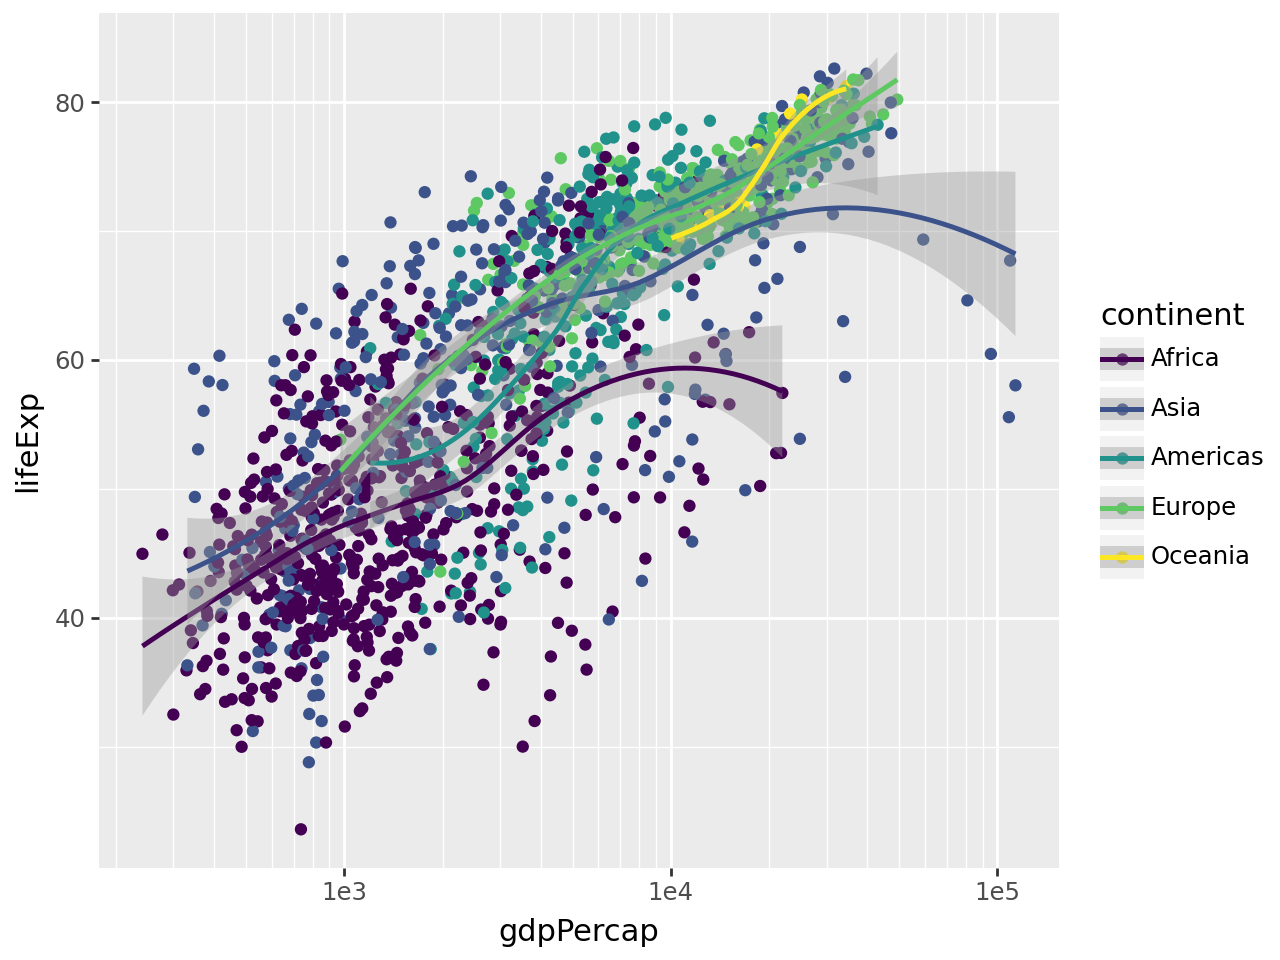

In [45]:
# Log scale
#for each continent
scatter_plot_log = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', color='continent'))
                    + geom_point()
                    + geom_smooth(method='loess')
                    + scale_x_log10())
scatter_plot_log.show()

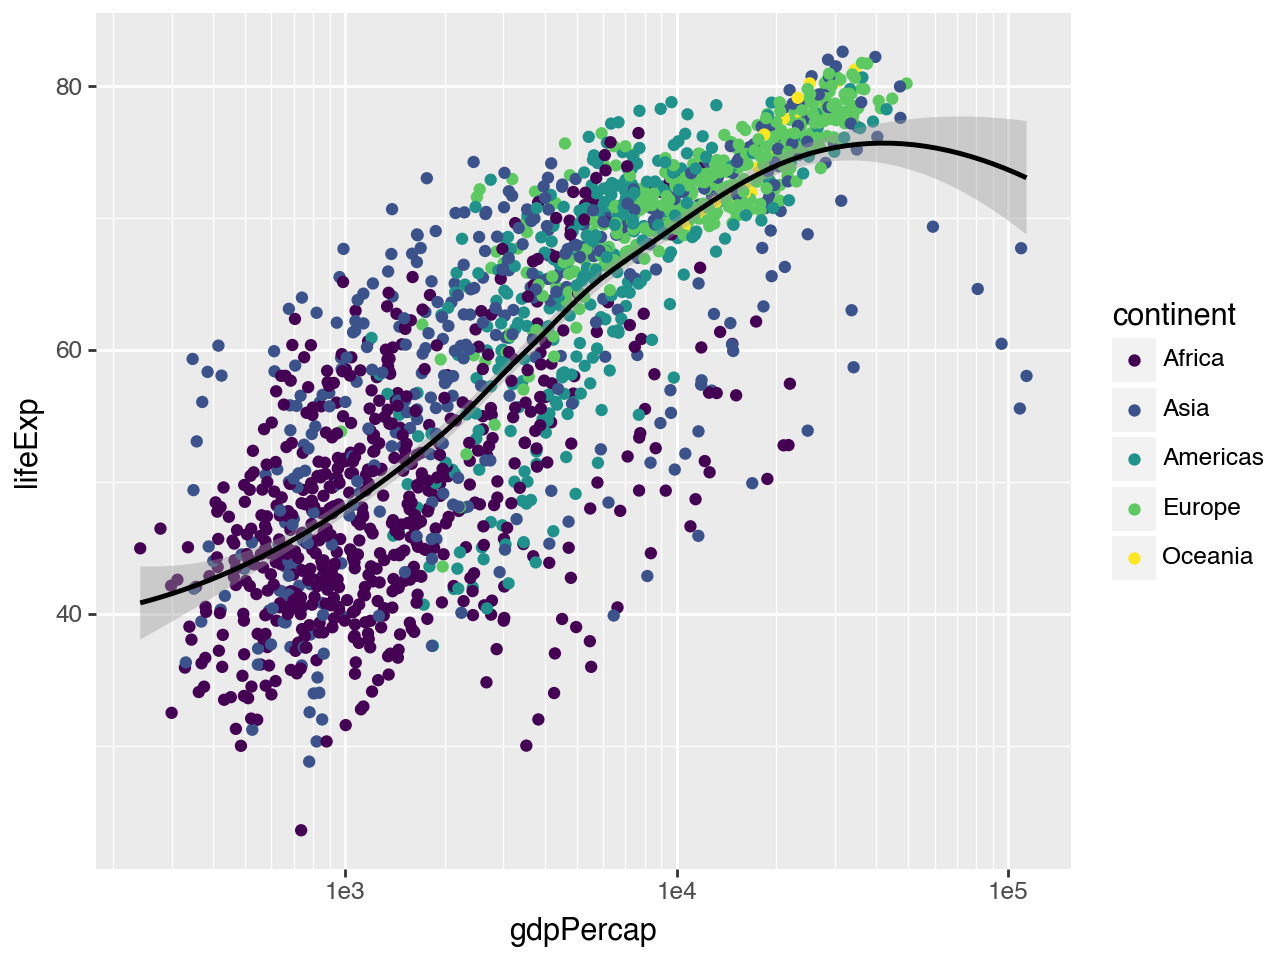

In [54]:
# Log scale
#for all continent
scatter_plot_log = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
                    + geom_point(aes(color='continent'))
                    + geom_smooth(method='loess')
                    + scale_x_log10())
scatter_plot_log.show()

### Customizing the Plot

Adjusting scale labels, legend position, and theme.

The last plot, on the log scale has ugly labels, let’s try to adjust the scale:

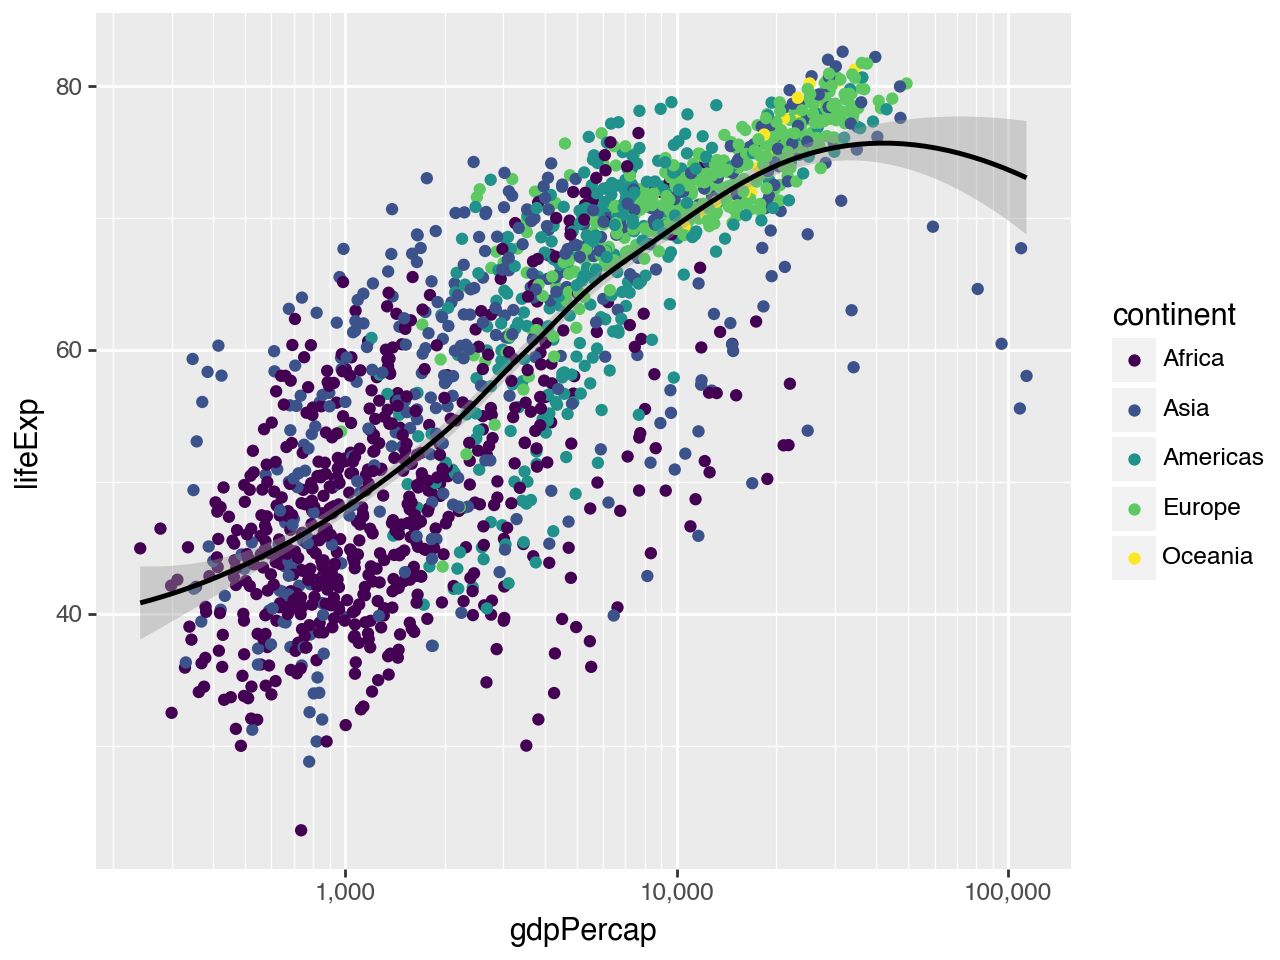

In [57]:
from plotnine import scale_x_log10, theme_bw

# Adjusting scale labels
scatter_plot_log_custom = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
                           + geom_point(aes(color='continent'))
                           + geom_smooth(method='loess')
                           + scale_x_log10(labels=lambda l: [f'{int(x):,}' for x in l]))
scatter_plot_log_custom.show()

Moving the legends inside the plot:

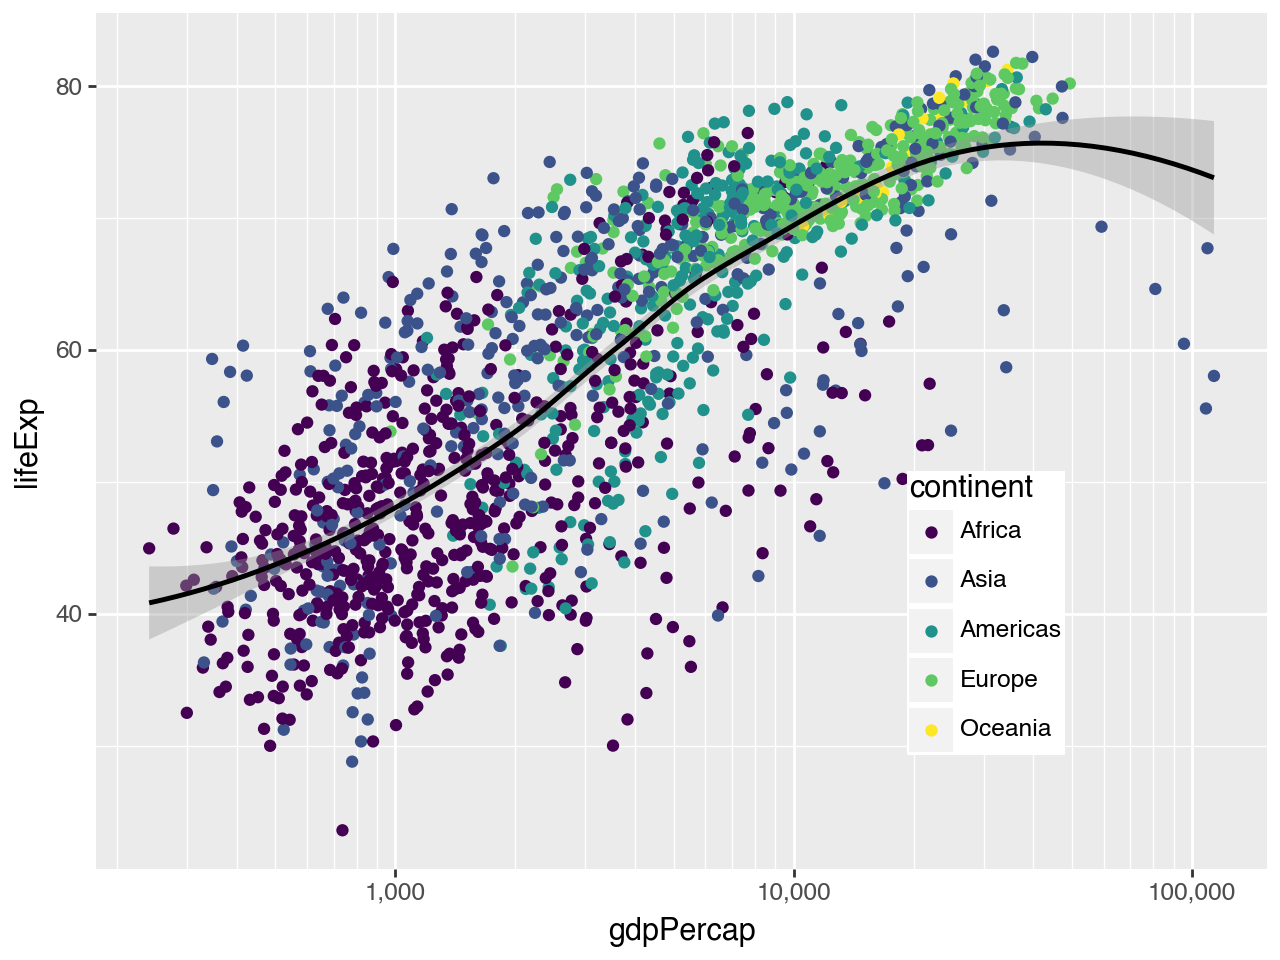

In [58]:
# Placing legend inside the plot
scatter_plot_legend_inside = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
                              + geom_point(aes(color='continent'))
                              + geom_smooth(method='loess')
                              + scale_x_log10(labels=lambda l: [f'{int(x):,}' for x in l])
                              + theme(legend_position=(0.8, 0.2)))
scatter_plot_legend_inside.show()

Changing the theme:

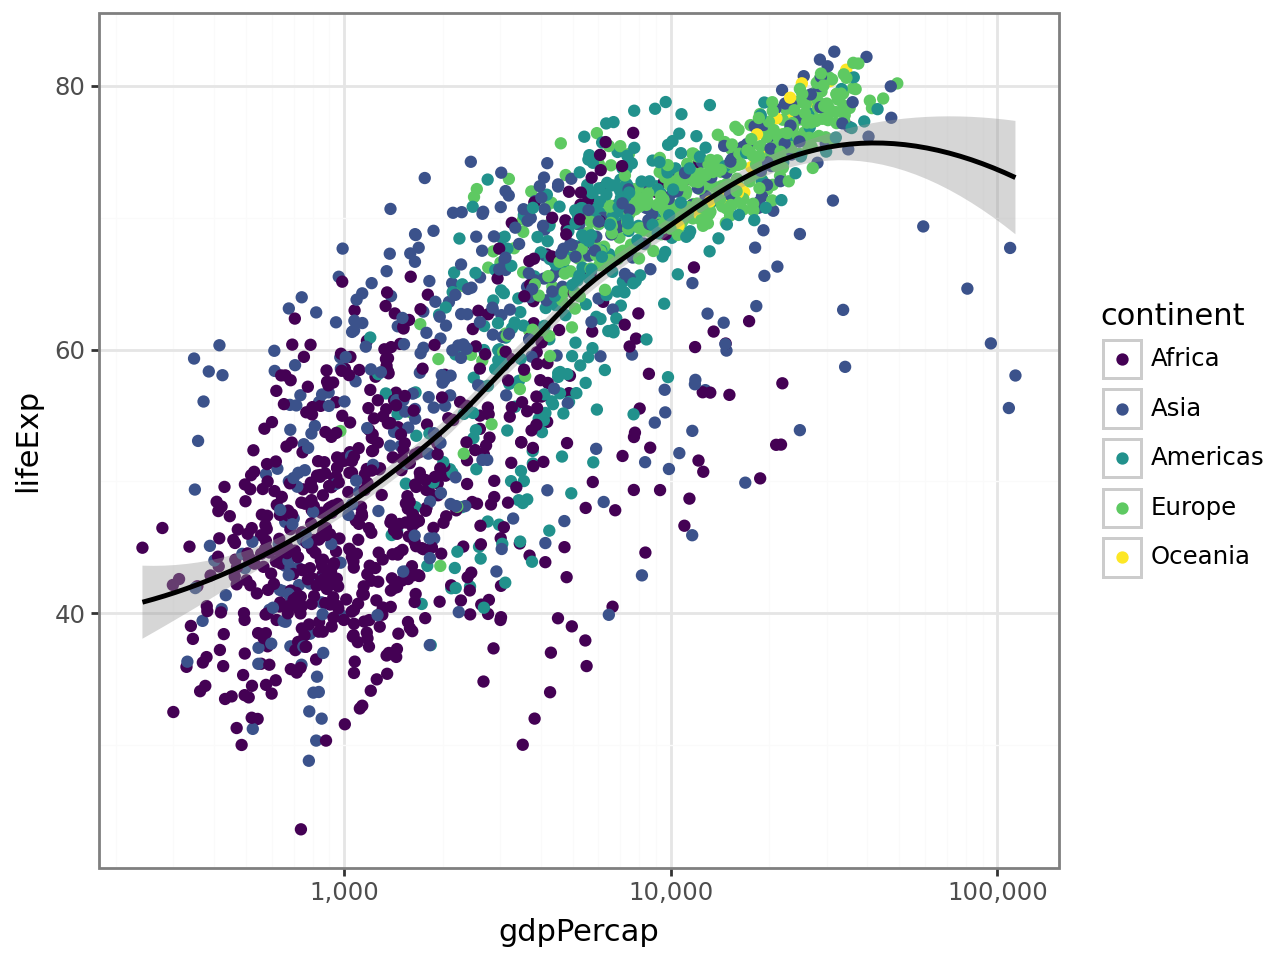

In [58]:
scatter_plot_theme = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
                              + geom_point(aes(color='continent'))
                              + geom_smooth(method='loess')
                              + scale_x_log10(labels=lambda l: [f'{int(x):,}' for x in l])
                              + theme(legend_position=(0.8, 0.2))
                              + theme_bw())
scatter_plot_theme.show()

Replacing the single loess smoothed curve with a separate regression line for each continent:

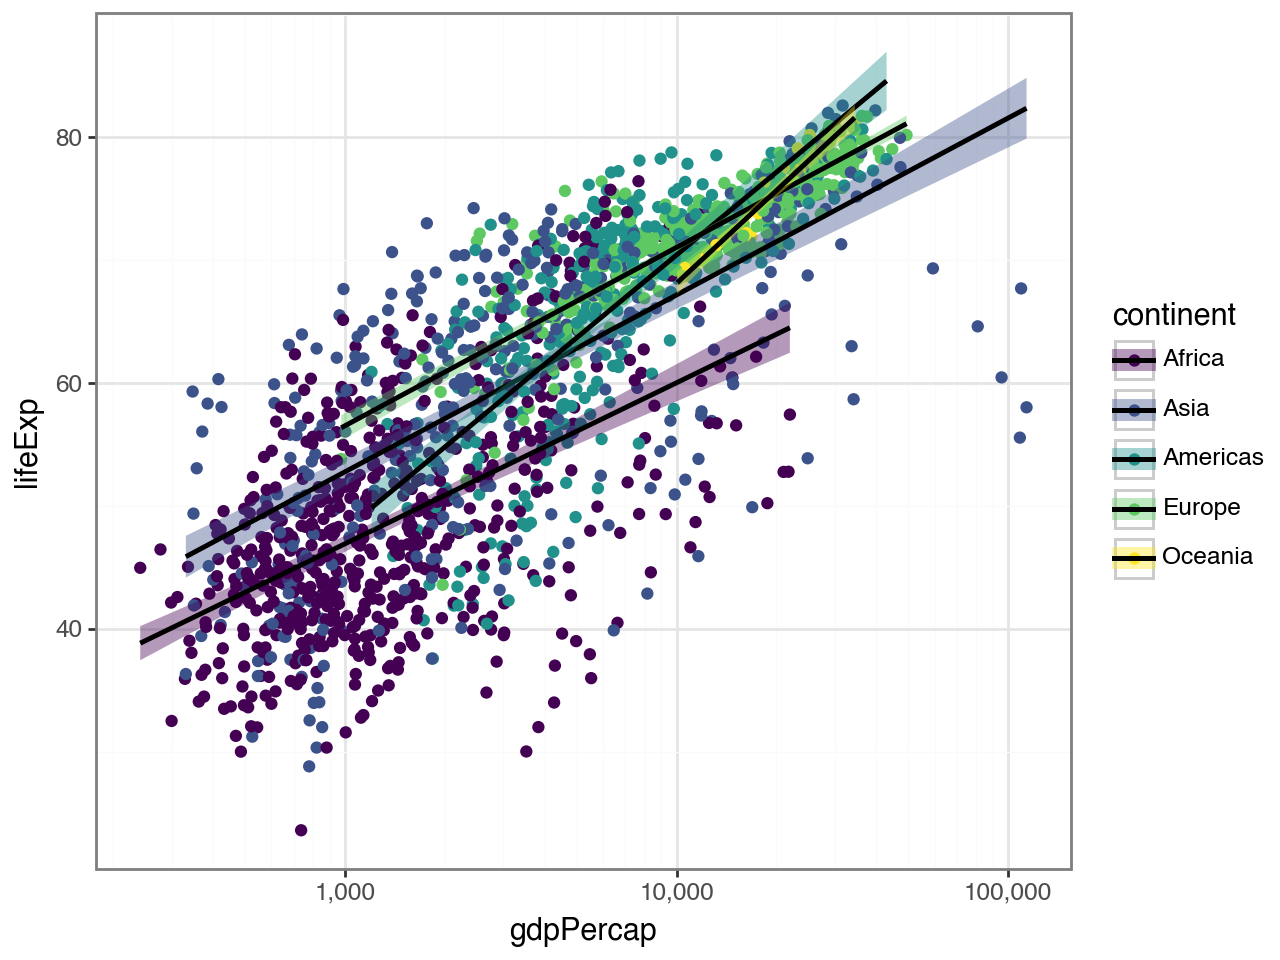

In [59]:
#smoothing by a regression line for each continent
scatter_plot_lm = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
                              + geom_point(aes(color='continent'))
                              + geom_smooth(aes(fill= 'continent'), method='lm')
                              + scale_x_log10(labels=lambda l: [f'{int(x):,}' for x in l])
                              + theme(legend_position=(0.8, 0.2))
                              + theme_bw())
scatter_plot_lm.show()

Making a “bubble” plot, mapping the `size` of each point to population (`pop`)

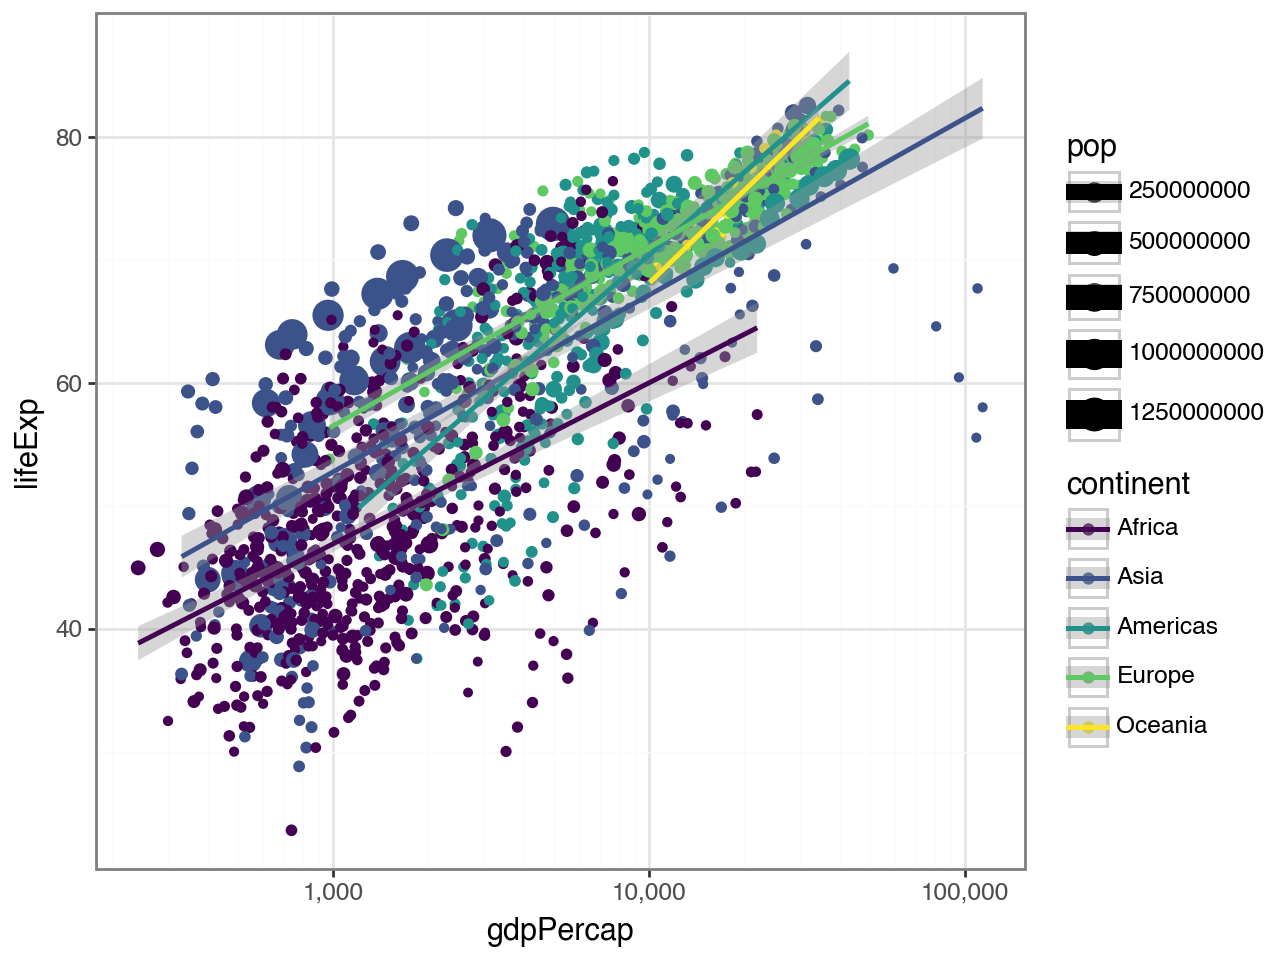

In [60]:
bubble_plot = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', size='pop', color='continent'))
               + geom_point()
               + geom_smooth(method='lm')
               + scale_x_log10(labels=lambda l: [f'{int(x):,}' for x in l])
               + theme_bw())
bubble_plot.show()

Changing color shades:

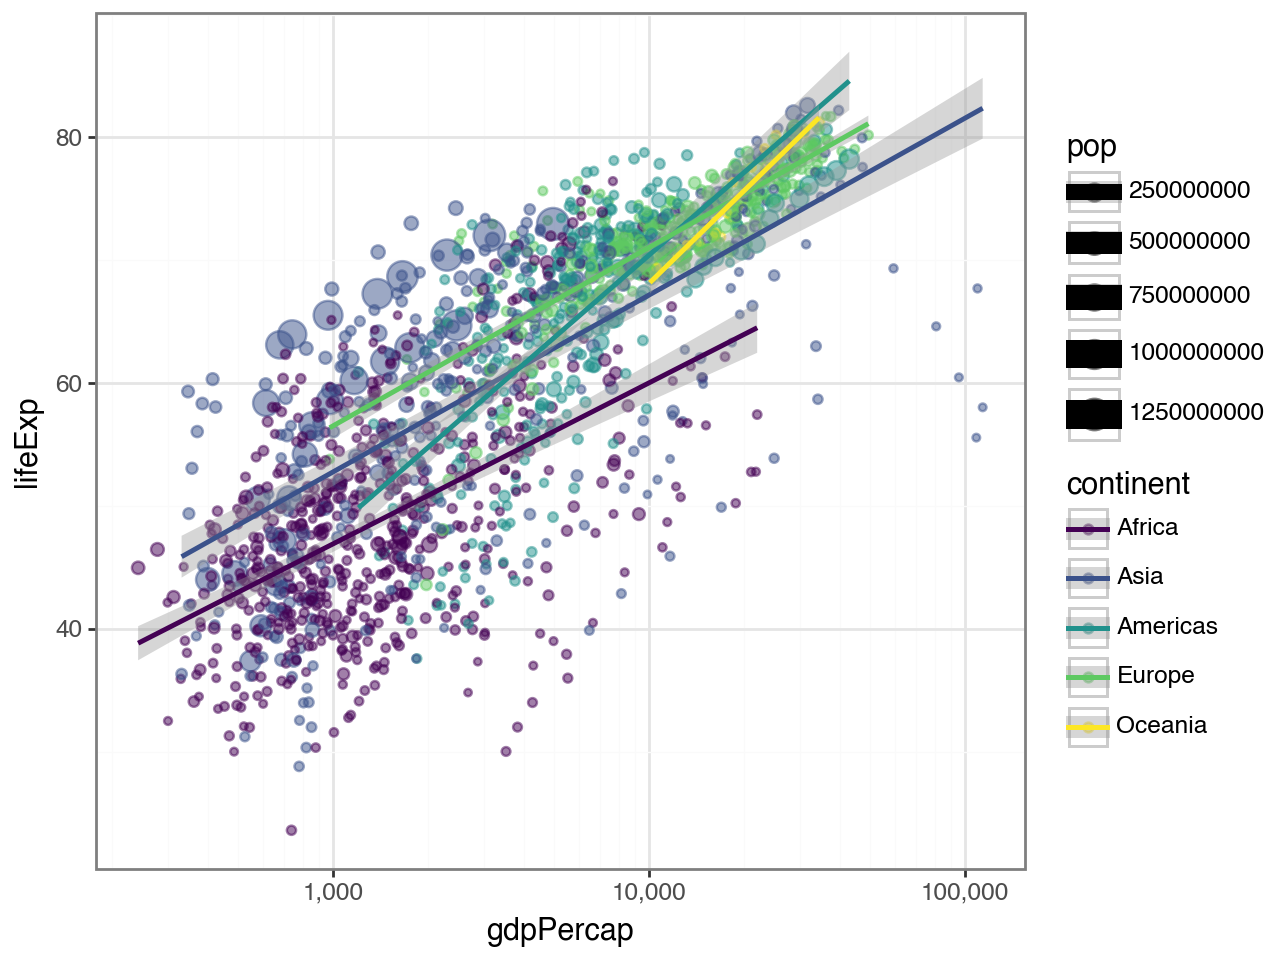

In [61]:
bubble_plot = (ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', size='pop', color='continent'))
               + geom_point(alpha=0.5)
               + geom_smooth(method='lm')
               + scale_x_log10(labels=lambda l: [f'{int(x):,}' for x in l])
               + theme_bw())
bubble_plot.show()

### Exploring Life Expectancy by Continent for a Given Year

Filtering data to show life expectancy for the year 2007.


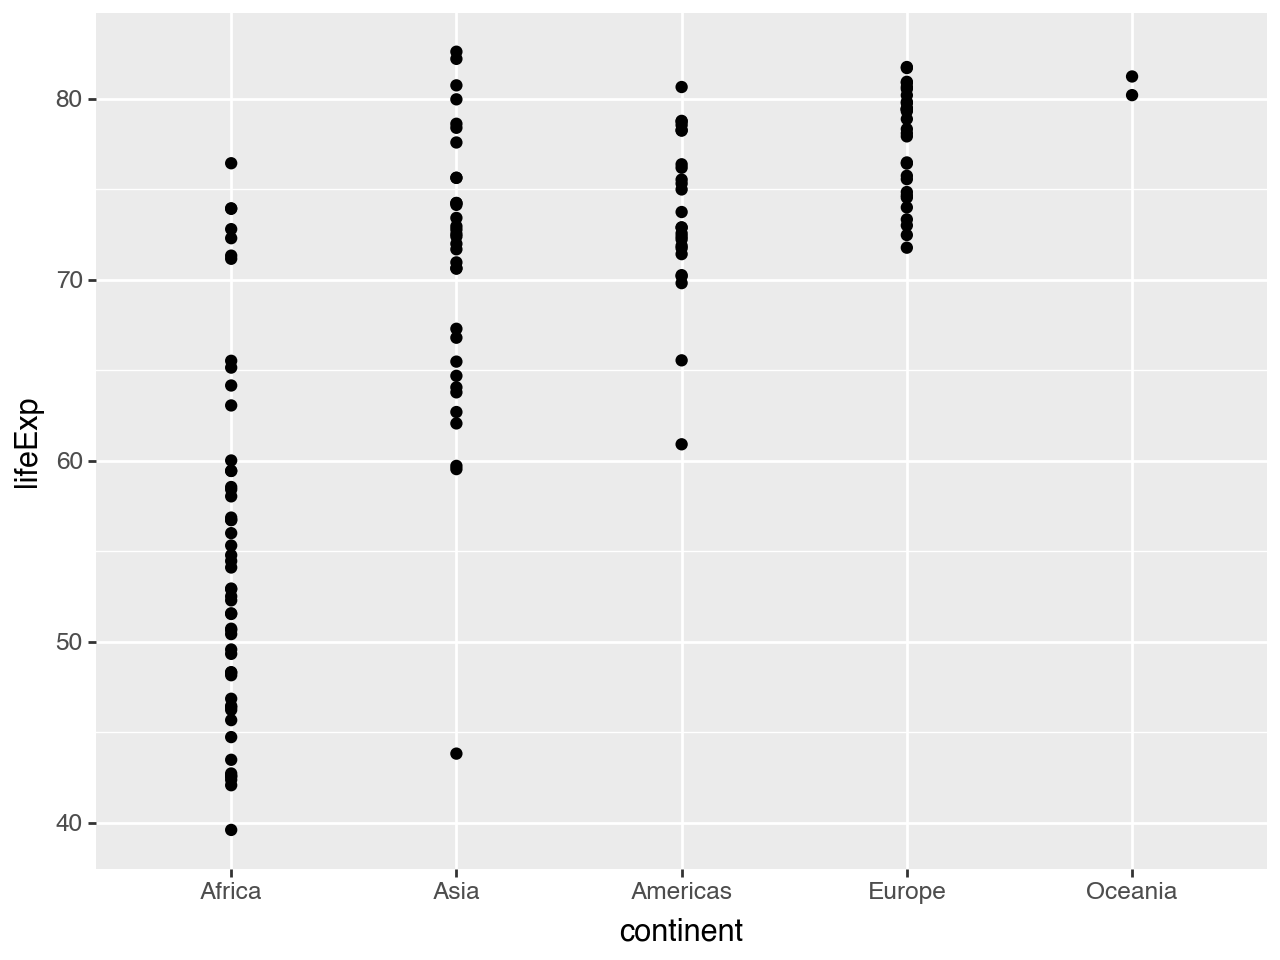

In [63]:
# Filter data for 2007
gm_2007 = gapminder[gapminder['year'] == 2007]

# Plot life expectancy by continent
gm_2007_plot = (ggplot(gm_2007, aes(y='lifeExp', x='continent'))
                + geom_point())
gm_2007_plot.show()

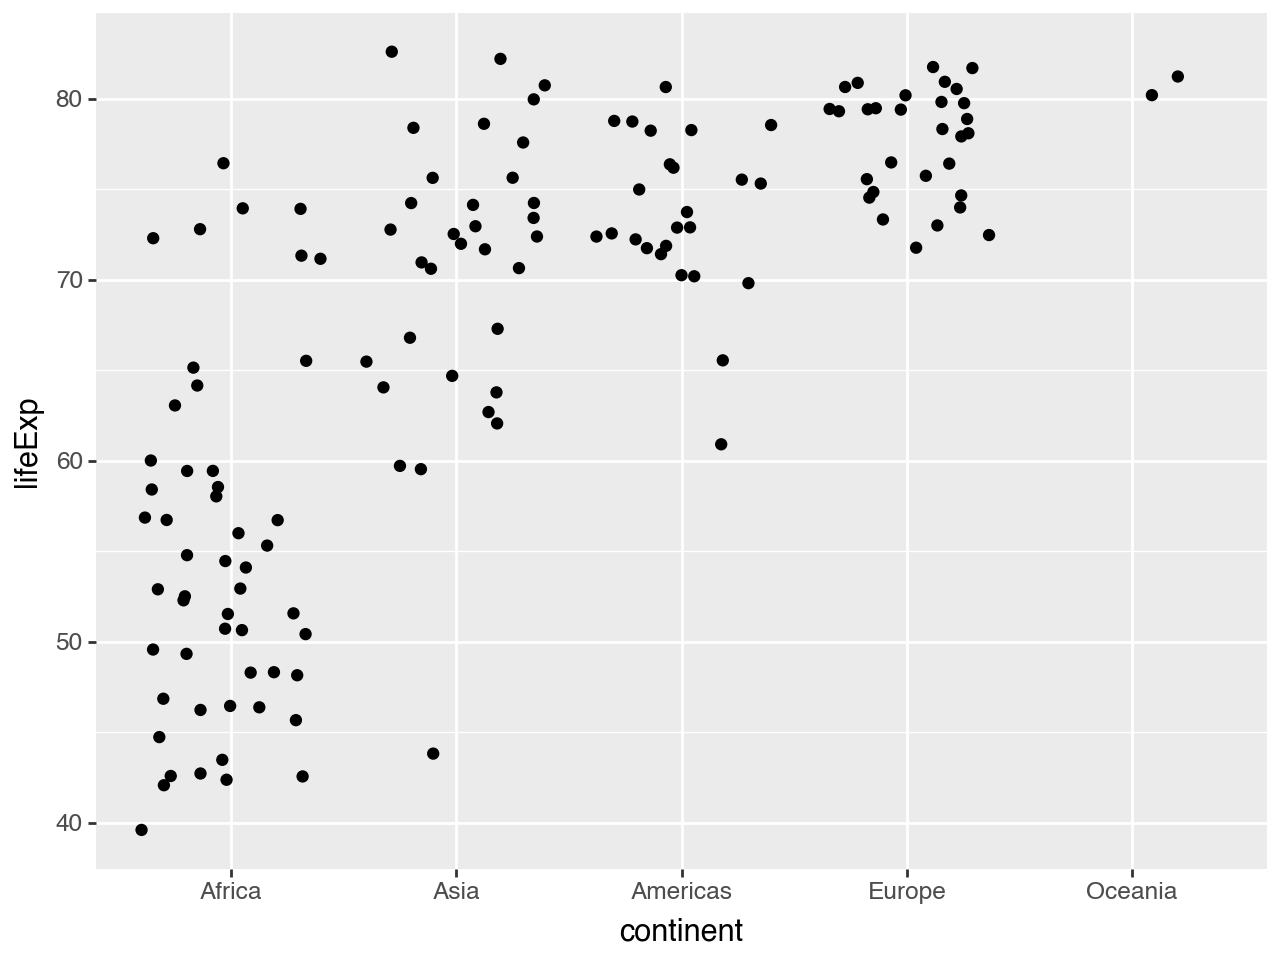

In [64]:
#changing scale by jittering 
# Plot with jitter
gm_2007_jitter = (ggplot(gm_2007, aes(y='lifeExp', x='continent'))
                  + geom_point(position='jitter'))
gm_2007_jitter.show()

## Advanced Customized and Fancy Plot

Explorinf gdp versus life expectancy in 2007 with highlighting the larger countries filter our data.


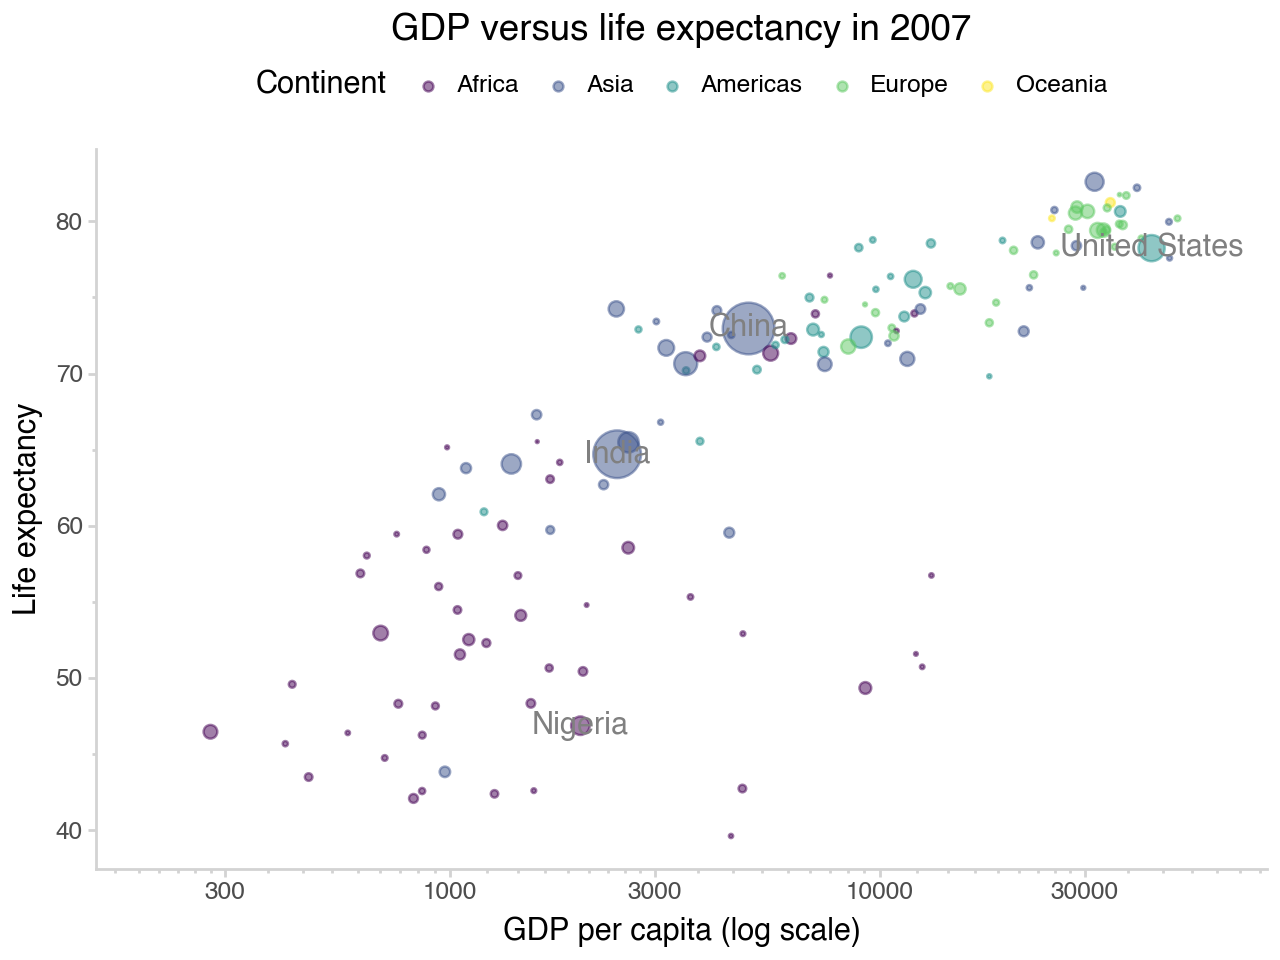

In [65]:
# Advanced customized bubble plot

advanced_bubble_plot = (
    ggplot(gm_2007)
    + geom_point(aes(x='gdpPercap', y='lifeExp', color='continent', size='pop'), alpha=0.5)
    + geom_text(aes(x='gdpPercap', y='lifeExp', label='country'), color='gray', 
                data=gm_2007[(gm_2007['pop'] > 1000000000) | (gm_2007['country'].isin(['Nigeria', 'United States']))])
    + scale_x_log10(limits=(200, 60000))
    + labs(title='GDP versus life expectancy in 2007',
           x='GDP per capita (log scale)',
           y='Life expectancy',
           size='Population',
           color='Continent')
    + scale_size(range=[0.1, 10])
    + guides(size='none')
    + theme_classic()
    + theme(legend_position='top',
            axis_line=element_line(color='#D3D3D3'),
            axis_ticks=element_line(color='#D3D3D3'))
    + guides(size=None,  # Remove size legend
              color='legend') 
)
advanced_bubble_plot.show()


